# Home Credit Risk Prediction

Default loans have curtailed money flow in the economy and growth in the private sector. Thus it is diminishing employment opportunities and pulling back the GDP and development growth of the country.

## Domain analysis
Understanding the Problem: The main objective is to predict the capability of loan applicants to repay their loans1. This helps loan providers avoid losses and increase profits.
Data Analysis: This involves understanding the dataset, which includes applicant data, credit data from the Credit Bureau, previous applications data from Home Credit, and more.
Feature Engineering: Relevant features are identified and engineered to improve the performance of the machine learning model.
Model Building: Various machine learning models can be used, such as Random Forest and XGBoost1. The choice of model depends on the problem and the constraints.
Evaluation: The performance of the model is evaluated using appropriate metrics. In this case, AUC (Area Under Curve) is used as the performance metric as it can handle imbalanced datasets.
Interpretability: While interpretability is not crucial in this case, some form of interpretability like feature importances can be provided.
Constraints: There are no strict latency constraints, and the cost of misclassification is high1. Therefore, the model should reduce misclassifications as much as possible.



# OBJECTIVES
To use Exploratory Data Analysis to understand the data and identify the hidden trends, anomalies, patterns, or relationships within the data.

To starts out with a high-level overview, then narrows into specific areas as we find intriguing areas of the data and find the important features in the dataset.

### Import the liabraries and Load the data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import sys
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
application_train = pd.read_csv('application_train.csv')

### application_train

In [3]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [5]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
application_train.shape

(307511, 122)

In [7]:
# Number of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
# Number of unique classes in each object column
# -- of catagorical variable
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Check missing data

In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values_table(application_train).head(10)


Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4



## Check data unbalance

**TARGET** value 0 means loan is repayed, value 1 means loan is not repayed.

In [11]:
application_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [12]:
# Percentage calculation
print("Percentage: ")
(application_train["TARGET"].value_counts()/application_train["TARGET"].count())*100

Percentage: 


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

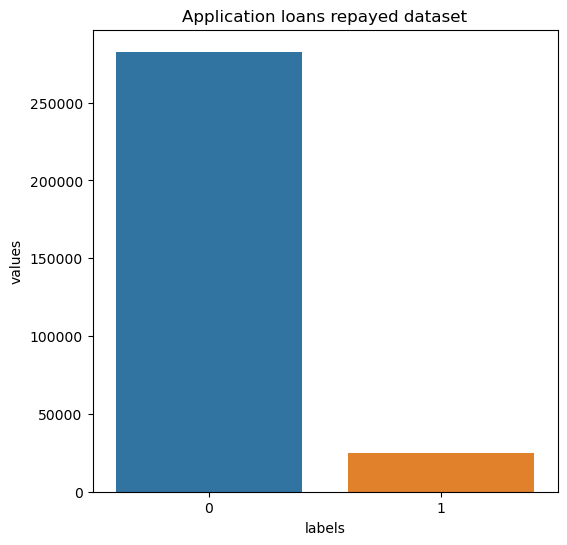

In [13]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
plt.show()


## Explore the data (EDA) Exploratory Data Analysis 


### Loan types


    
Let's see the type of the loans taken and also, on a separate plot, the percent of the loans (by type of the loan) with **TARGET** value 1 (not returned loan).

In [14]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

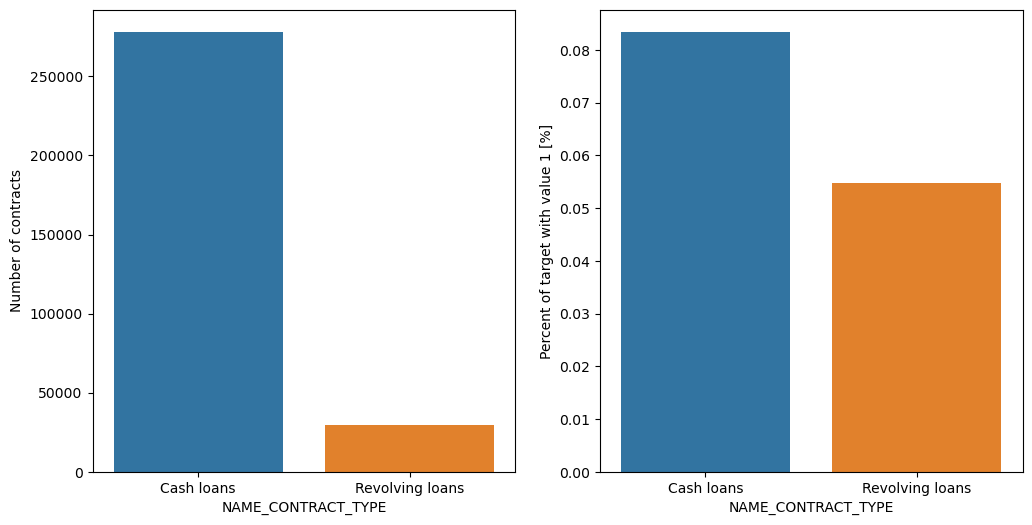

In [15]:
plot_stats('NAME_CONTRACT_TYPE')

Contract type *Revolving loans* are just a small fraction from the total number of loans; in the same time, a larger amount of *Revolving loans*, comparing with their frequency, are not repaid.

### Client gender

Let's see the gender of the clients and also, on a separate plot, the percent of the loans (by client gender) with TARGET value 1 (not returned loan).

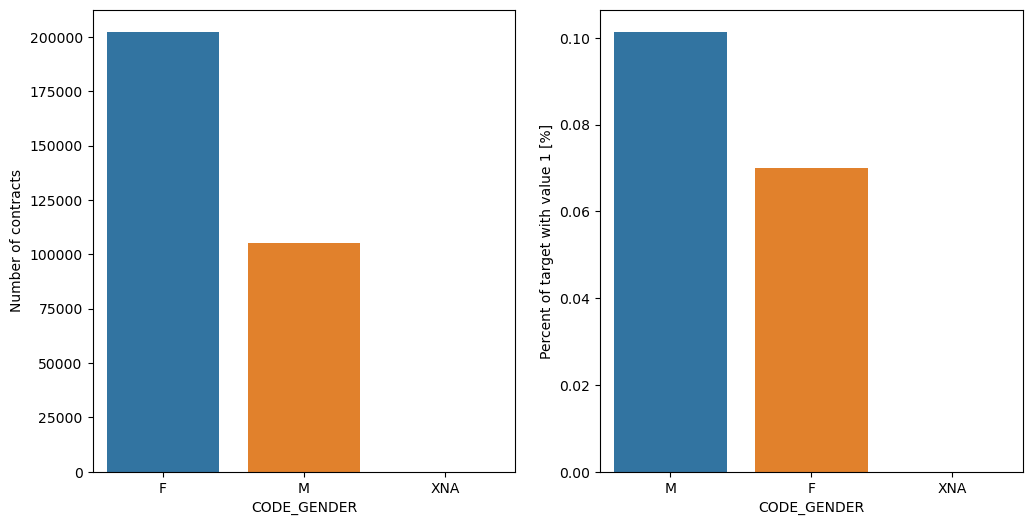

In [16]:
plot_stats('CODE_GENDER')

The number of female clients is almost double  the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans.

### Flag own car and flag own real estate

Let's inspect the  flags that tell us if a client owns a car or real estate and, on separate plots, the percent of the loans value of these flags) with TARGET value 1 (not returned loan).

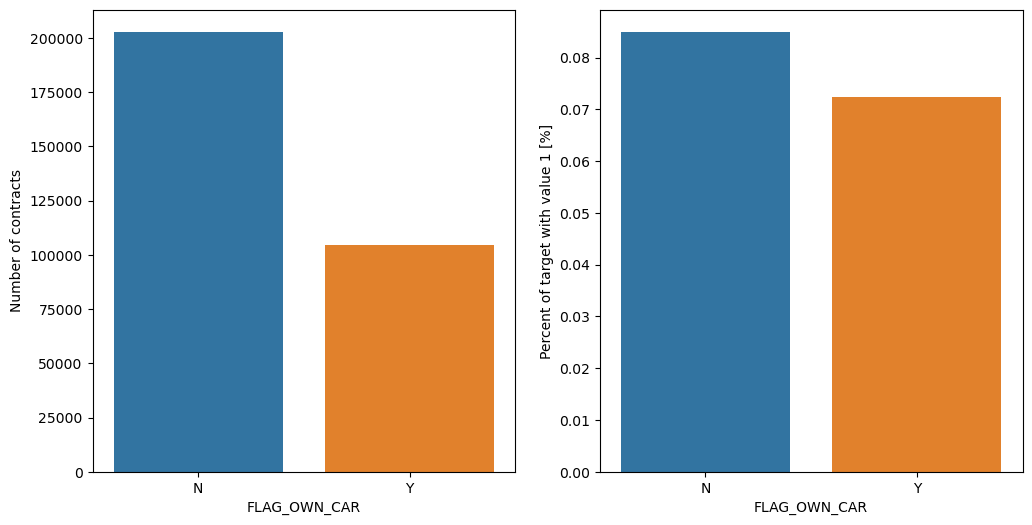

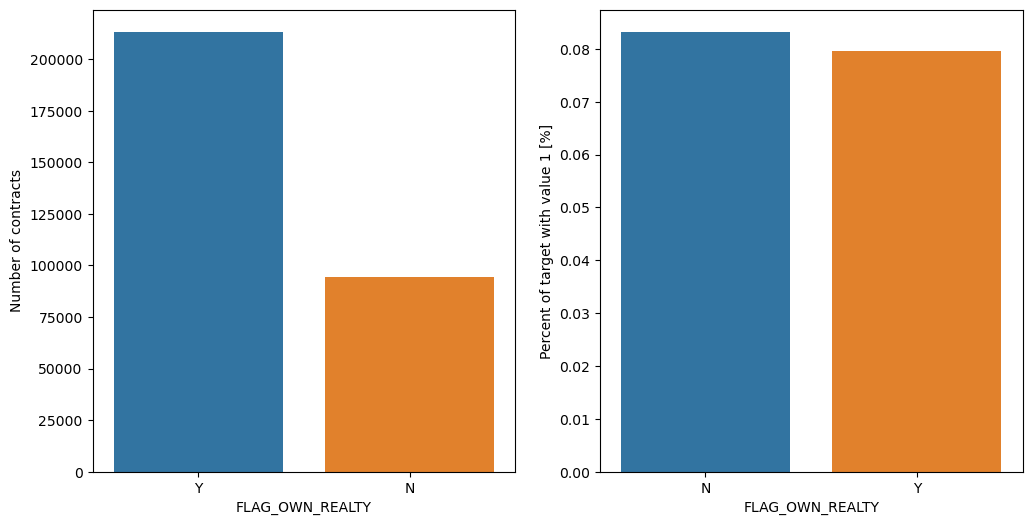

In [17]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

The clients that owns a car are almost a half of the ones that doesn't own one. Both categories have not-repayment rates around 8%.

The clients that owns real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have not-repayment rates around 8%.


### Client  accompanied by 

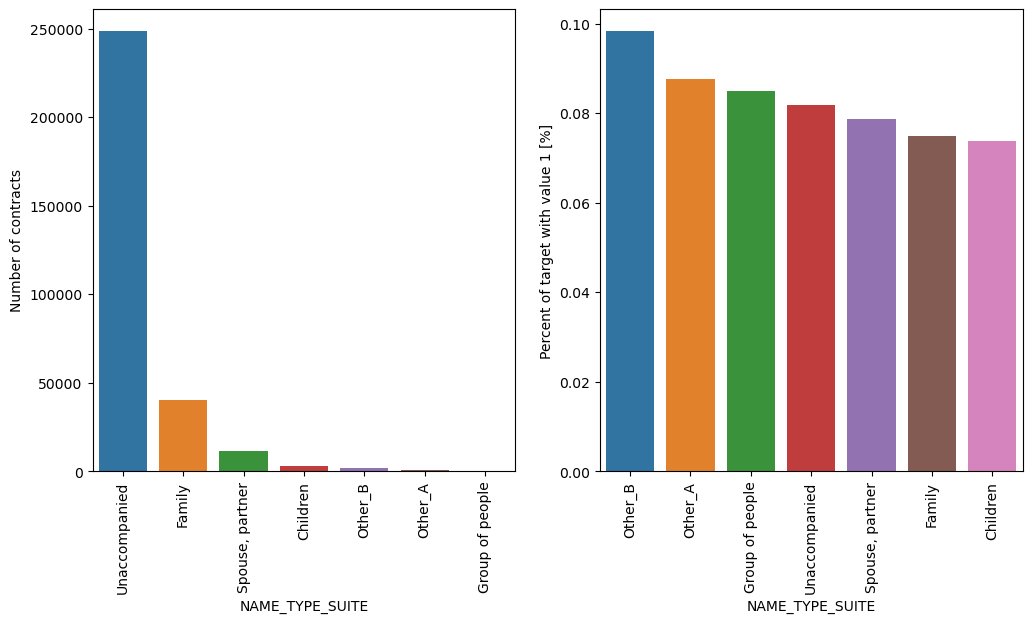

In [18]:
plot_stats('NAME_TYPE_SUITE',True, True)

Most of clients are unaccompanied while applying for the loan. 
In terms of percentage of not repayment of loan,  clients accompanied by Other_B and Other_A are less likely to repay.

### Family status of client

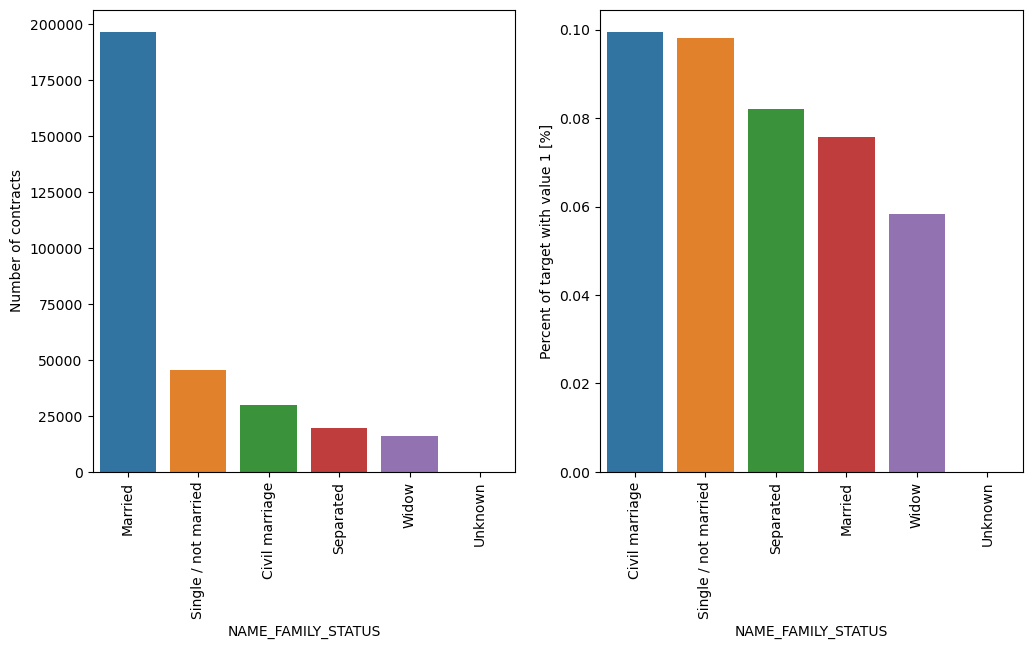

In [19]:
plot_stats('NAME_FAMILY_STATUS',True, True)

Most of clients are married, followed by Single/not married and civil marriage.

In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being *Unknown*).

### Number of children

Let's see what is the distribution of the number of children of the clients.

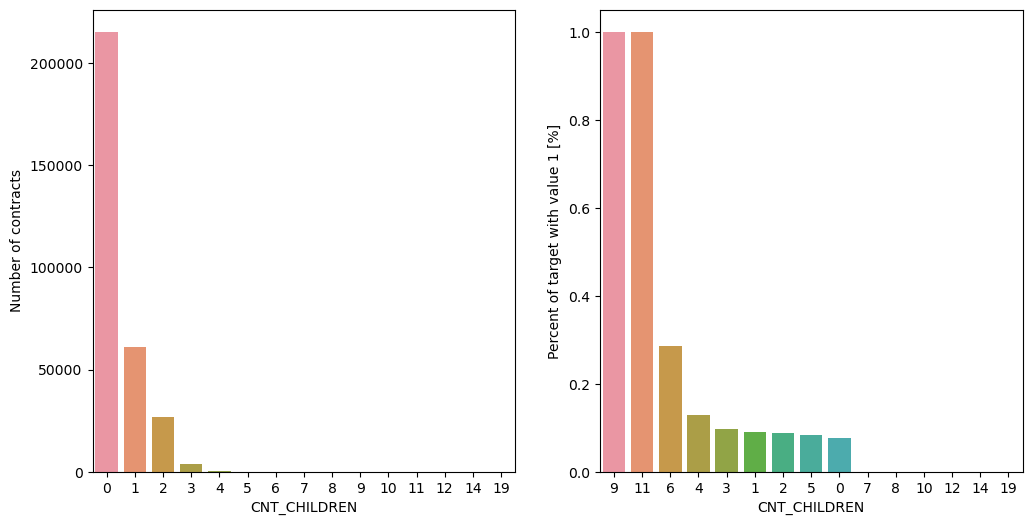

In [20]:
plot_stats('CNT_CHILDREN')

Most of the clients taking a loan have no children. The number of loans associated with the clients with one children are 4 times smaller, the number of loans associated with the clients with two children are 8 times smaller; clients with 3, 4 or more children are much more rare. 

As for repayment, clients with no children, 1, 2, 3, and 5 children have percent of no repayment around the average (10%). The clients with 4 and 6 children are above average in terms of percent of not paid back loans (over 25% for families with 6 children).

As for clients with 9 or 11 children, the percent of loans not repaid is 100%.



### Number of family members of client

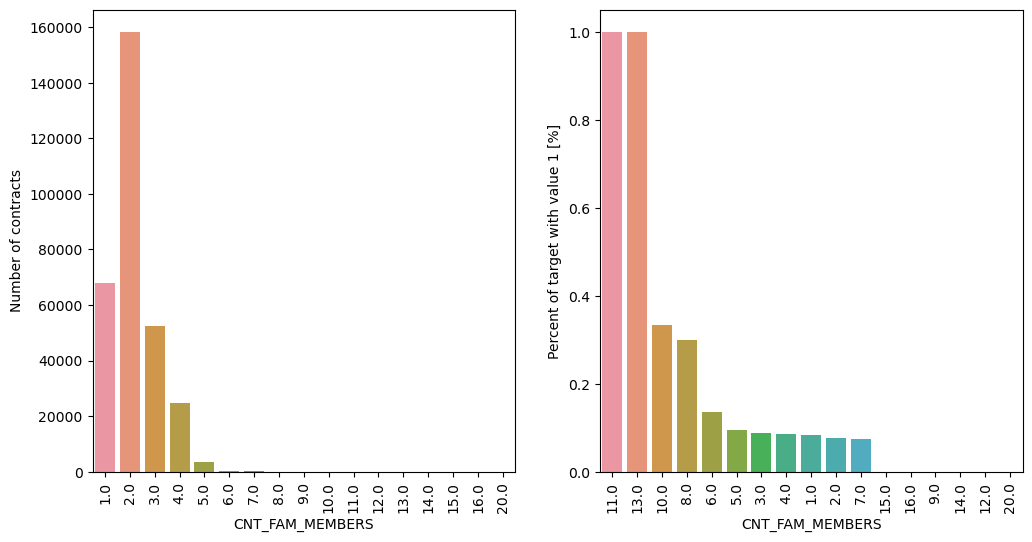

In [21]:
plot_stats('CNT_FAM_MEMBERS',True)

Clients with family members of 2 are most numerous, followed by 1 (single persons), 3 (families with one child) and 4.

Clients with family size of 11 and 13 have 100% not repayment rate. Other families with 10 or 8 members have percent of not repayment of loans over 30%. Families with 6 or less members have repayment rates close to the 10% average.


### Income type of client

Let's investigate the numbers of clients with different income type. As well, let's see the percent of not returned loans per income type of applicants.

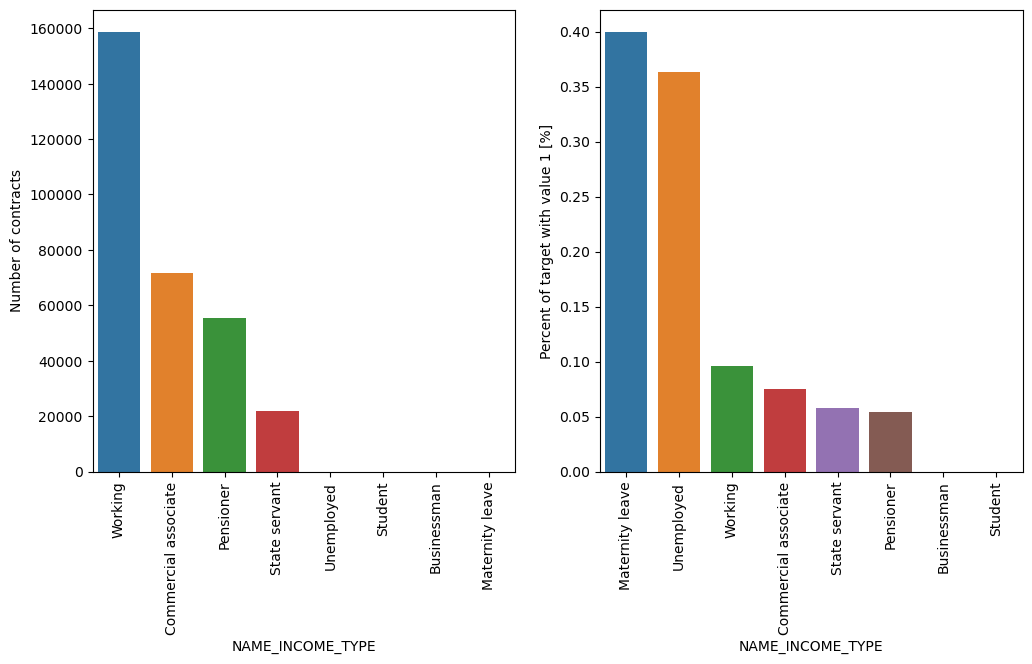

In [22]:
plot_stats('NAME_INCOME_TYPE',True,True)

Most of applicants for loans are income from *Working*, followed by *Commercial associate*, *Pensioner* and *State servant*.

The applicants with the type of income *Maternity leave* have almost 40% ratio of not returning loans, followed by *Unemployed* (37%). The rest of types of incomes are under the average of 10% for not returning loans.


### Occupation of client



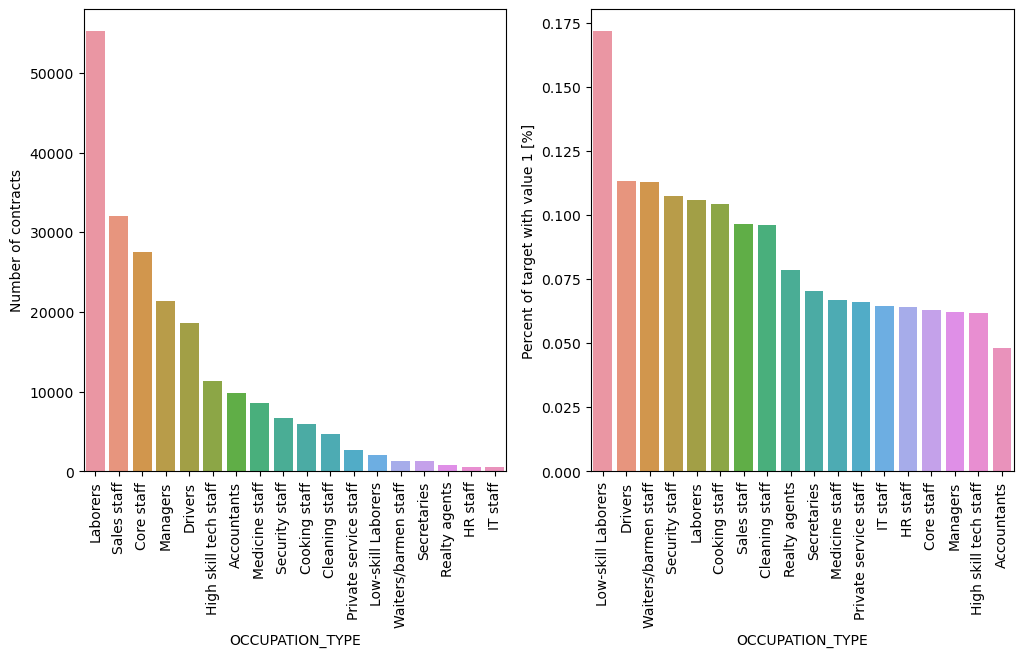

In [23]:
plot_stats('OCCUPATION_TYPE',True, True)

Most of the loans are taken by *Laborers*, followed by *Sales staff*. *IT staff* take the lowest amount of loans.

The category with highest percent of not repaid loans are *Low-skill Laborers* (above 17%), followed by *Drivers* and *Waiters/barmen staff*, *Security staff*, *Laborers* and *Cooking staff*.

### Organization type

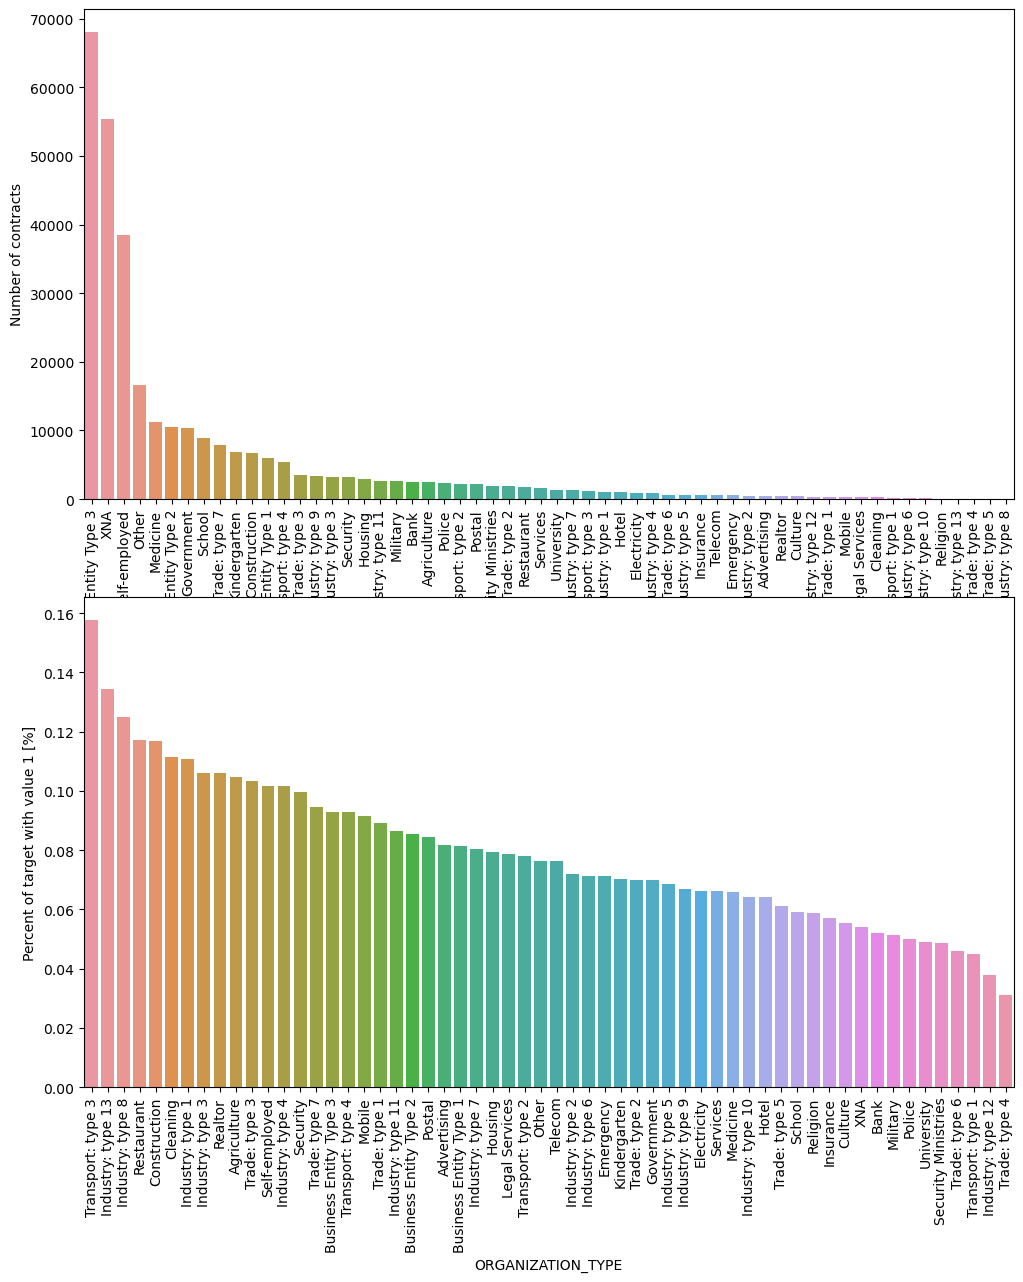

In [24]:
plot_stats('ORGANIZATION_TYPE',True, False)

Organizations with highest percent of loans not repaid are *Transport: type 3* (16%), *Industry: type 13* (13.5%), *Industry: type 8* (12.5%) and *Restaurant* (less than 12%).

### Education type of the client

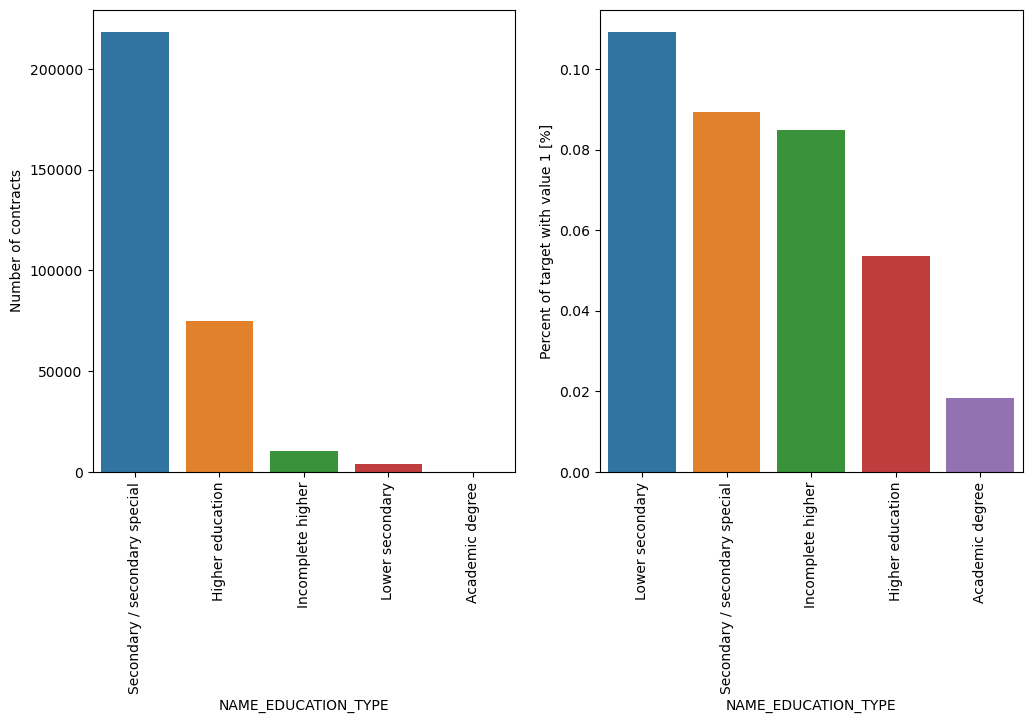

In [25]:
plot_stats('NAME_EDUCATION_TYPE',True)

Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.

The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% not-repayment rate.


### Type of the housing of client

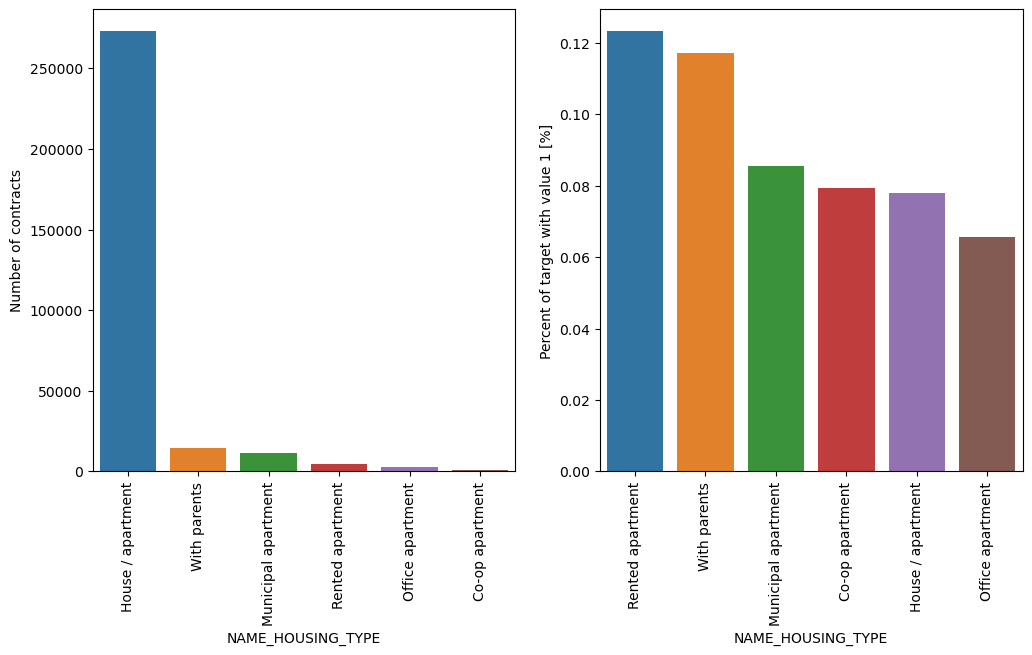

In [26]:
plot_stats('NAME_HOUSING_TYPE',True)

Over 250,000 applicants for credits registered their housing as House/apartment. Following categories have a very small number of clients (With parents, Municipal appartment).

From these categories, *Rented apartment* and *With parents* have higher than 10% not-repayment rate.

### Total income distribution

Let's plot the distribution of total income for the clients.

In [27]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

In [28]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [29]:
application_train['AMT_INCOME_TOTAL'].min(),application_train['AMT_INCOME_TOTAL'].max()

(25650.0, 117000000.0)

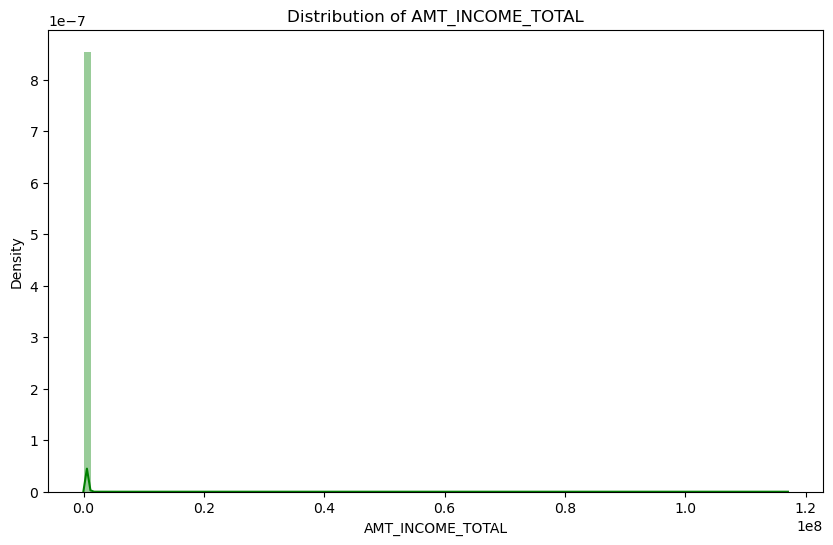

In [30]:
plot_distribution('AMT_INCOME_TOTAL','green')


The income values are very high for certail obervation so why the graph appers like this. As we are doing anomaly detection we won't be removing them.

### Credit distribution

Let's plot the credit distribution.

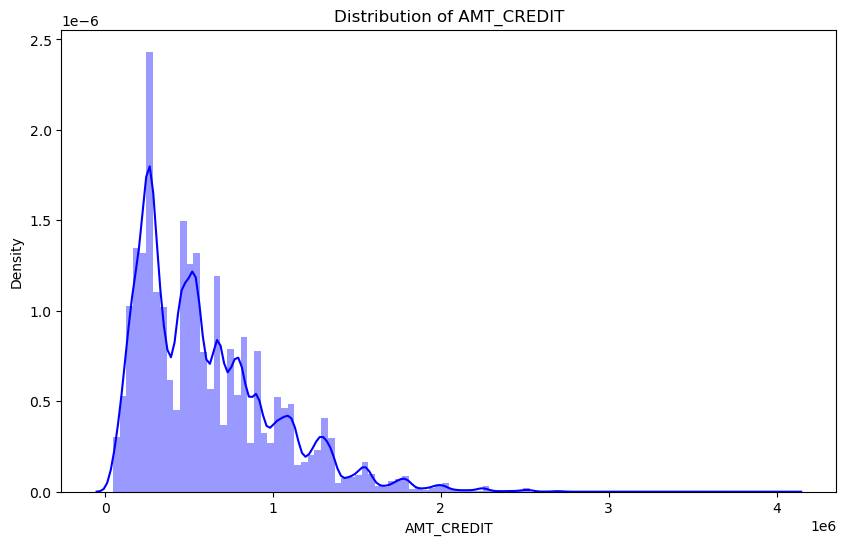

In [31]:
plot_distribution('AMT_CREDIT','blue')

### Annuity distribution

Let's plot the annuity distribution.

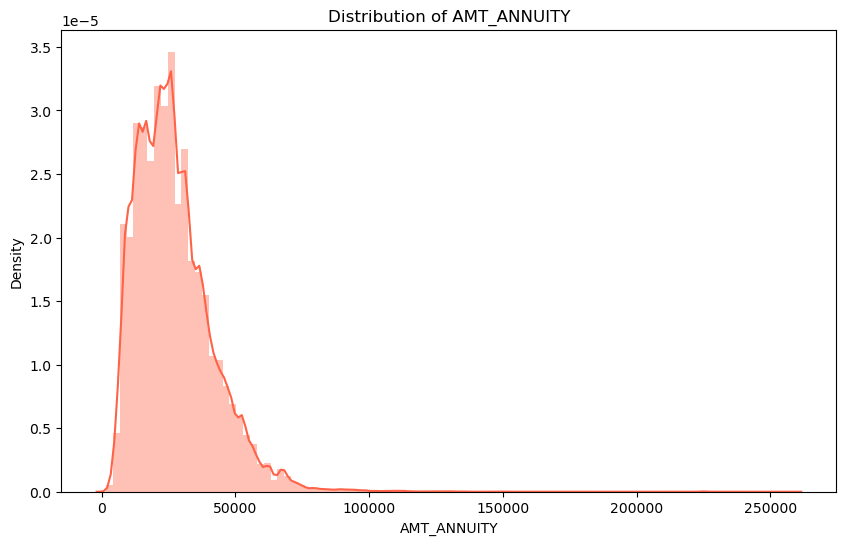

In [32]:
plot_distribution('AMT_ANNUITY','tomato')

### Goods price

Let's plot the good price distribution.

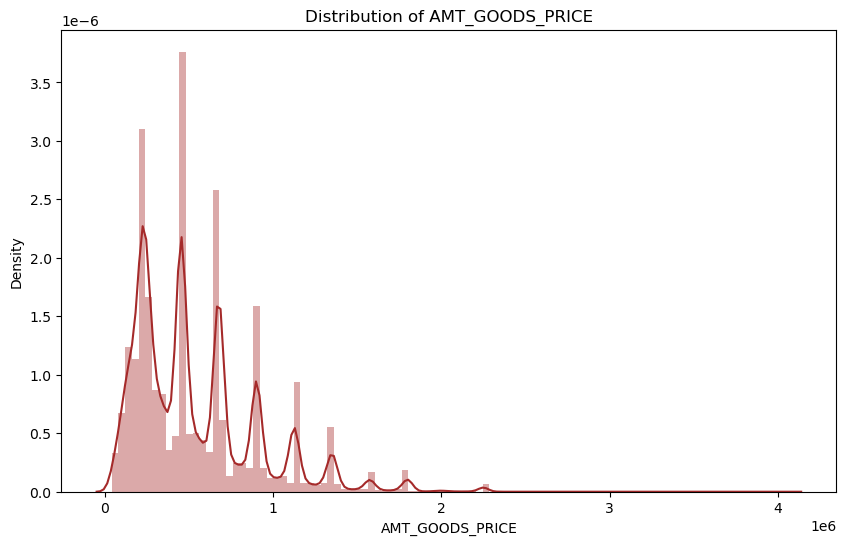

In [33]:
plot_distribution('AMT_GOODS_PRICE','brown')

### Days from birth distribution

Let's plot the distribution number of days from birth.

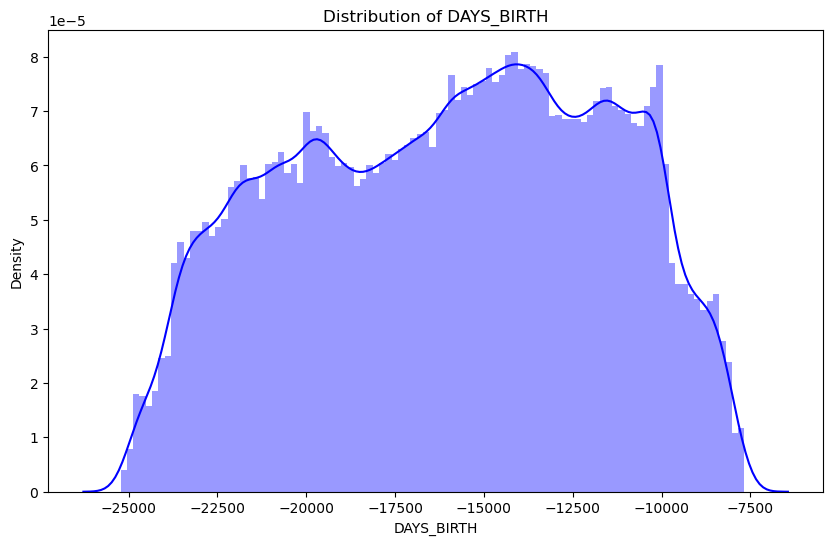

In [34]:
plot_distribution('DAYS_BIRTH','blue')

The negative value means that the date of birth is in the past. The age range is between approximative 20 and 68 years.

Lets dig more on age

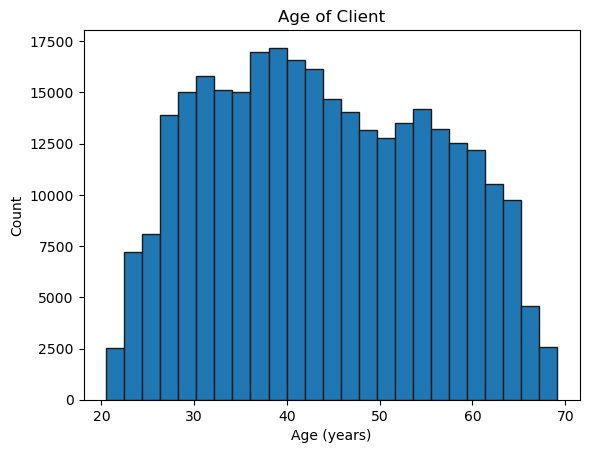

In [35]:
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])

# Plot the distribution of ages in years
plt.hist(application_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

There are no outliers as all the ages are reasonable. lets visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. 

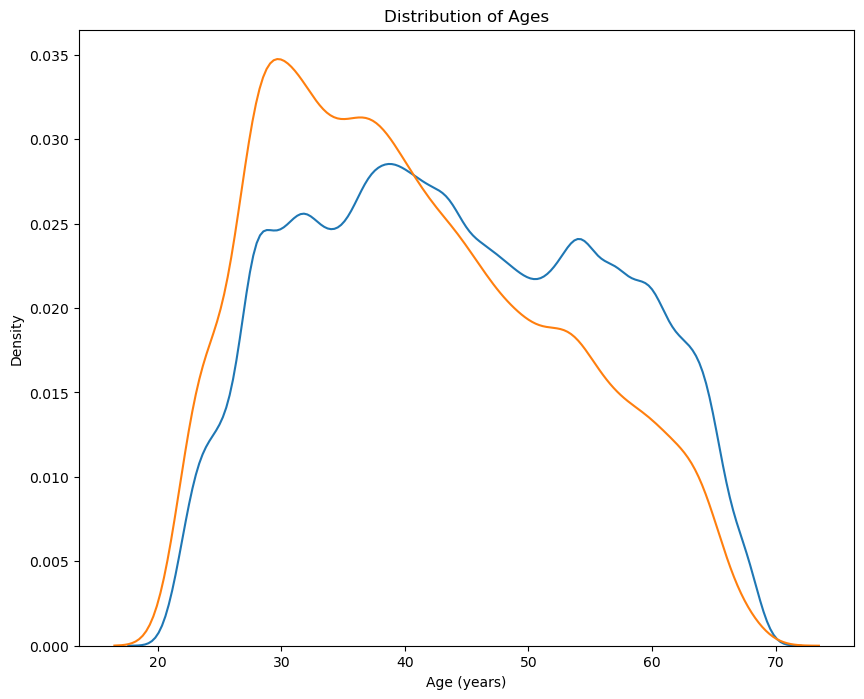

In [36]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. 

Thus, There is a clear trend: younger applicants are more likely to not repay the loan! This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

### Days employed distribution

Let's represent the distribution of number of days employed.

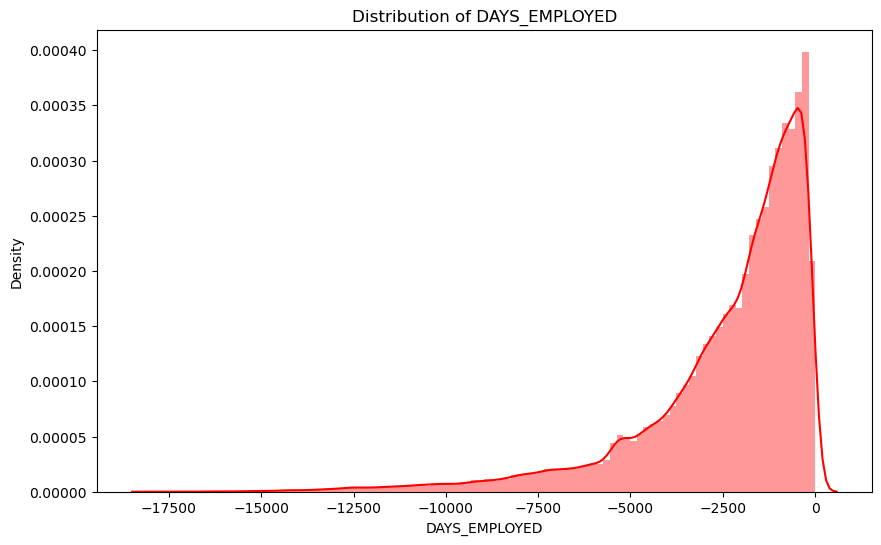

In [37]:
# Replace the anomalous values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plot_distribution('DAYS_EMPLOYED','red')

### Days of registration distribution

Let's plot the distribution of `DAYS_REGISTRATION`.

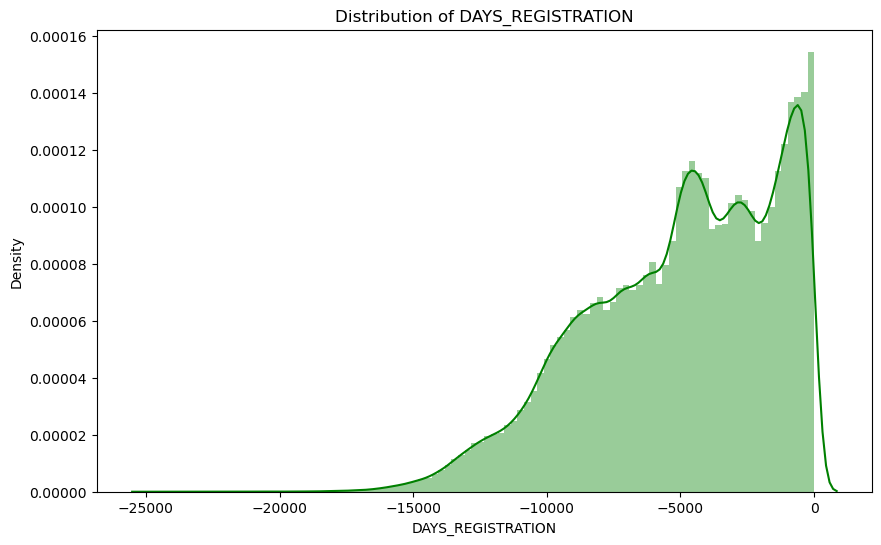

In [38]:
plot_distribution('DAYS_REGISTRATION','green')

### Days ID publish distribution

Let's plot the distribution of DAYS_ID_PUBLISH.

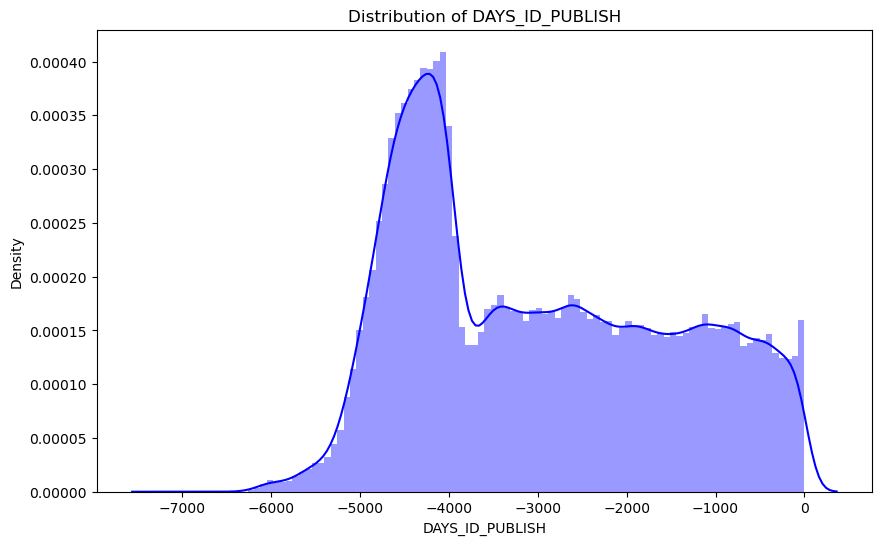

In [39]:
plot_distribution('DAYS_ID_PUBLISH','blue')

### Comparison of interval values with TARGET = 1 and TARGET = 0

Let's compare the distribution of interval values ploted above for values of **TARGET = 1** and **TARGET = 0**

<Figure size 640x480 with 0 Axes>

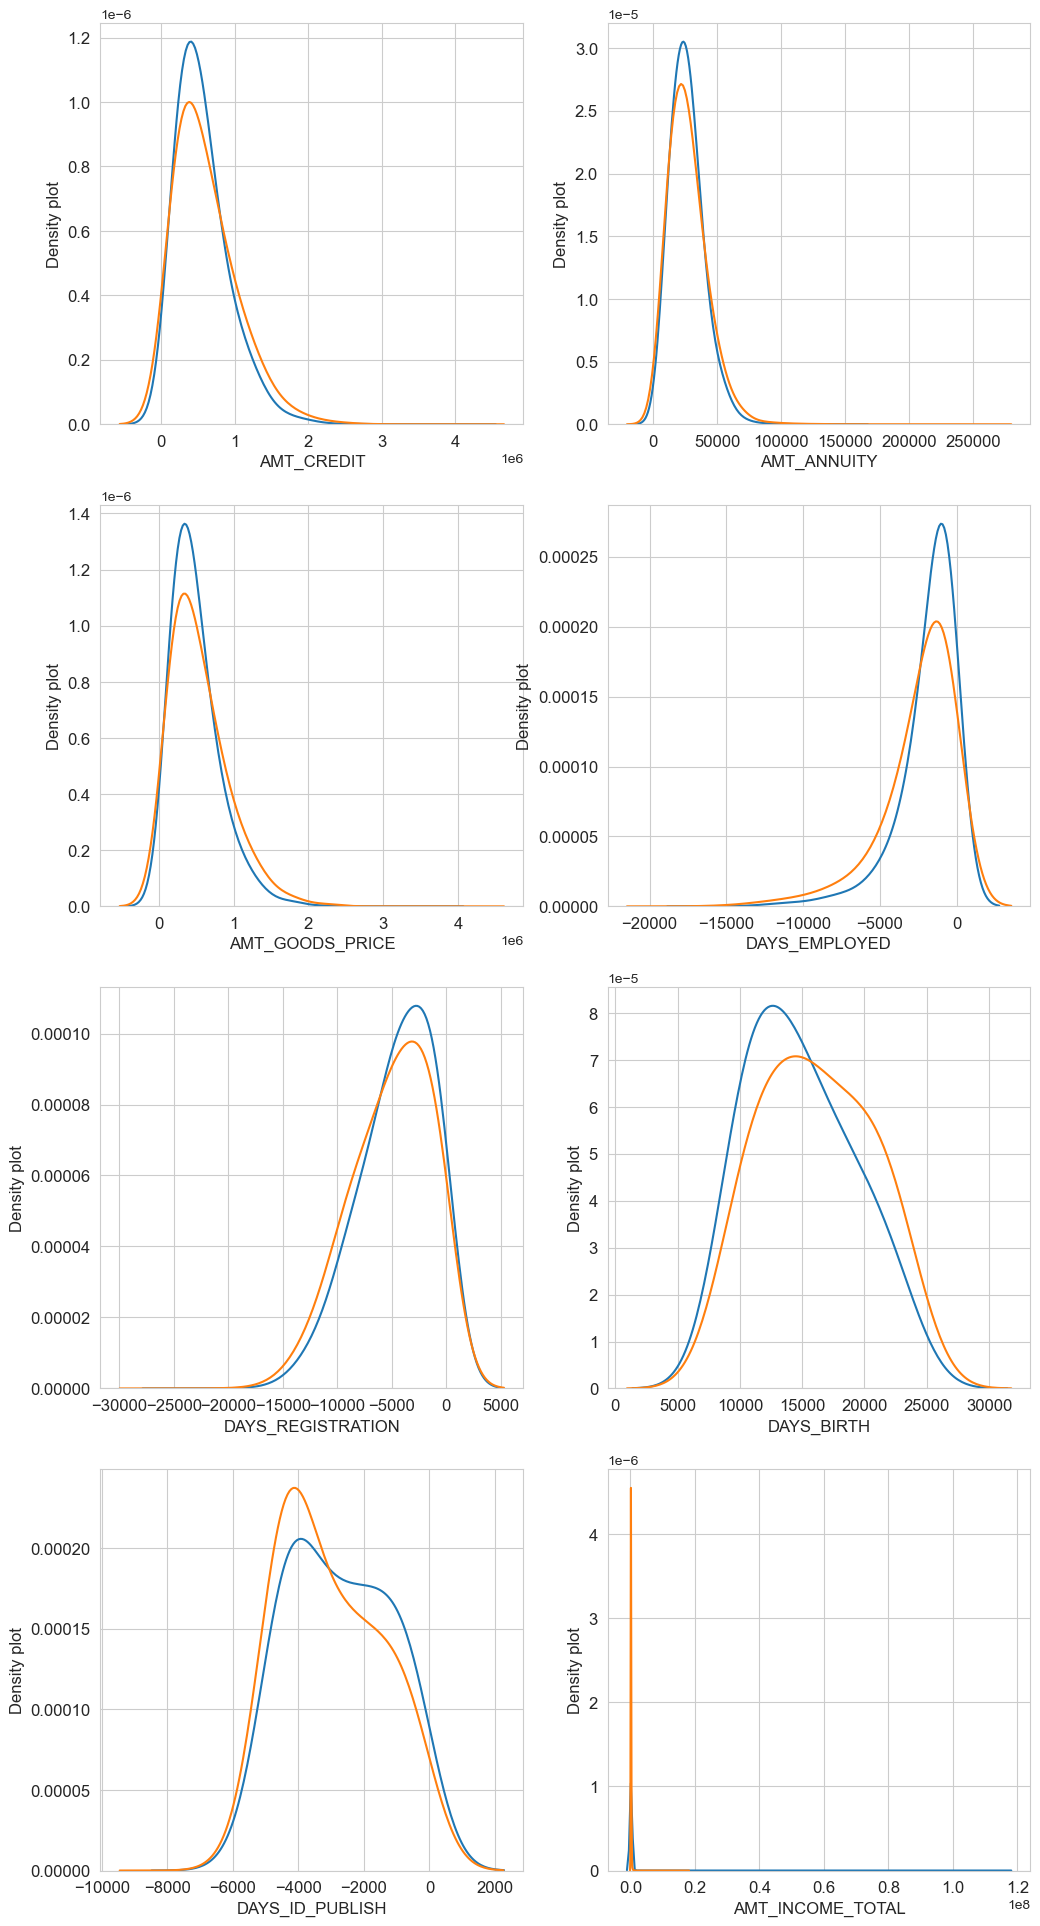

In [40]:
var = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH','AMT_INCOME_TOTAL']
plot_distribution_comp(var,nrow=4)

### Region registered not live region and not work region

Let's represent the values of region registered and not live region and region registered and not work region.

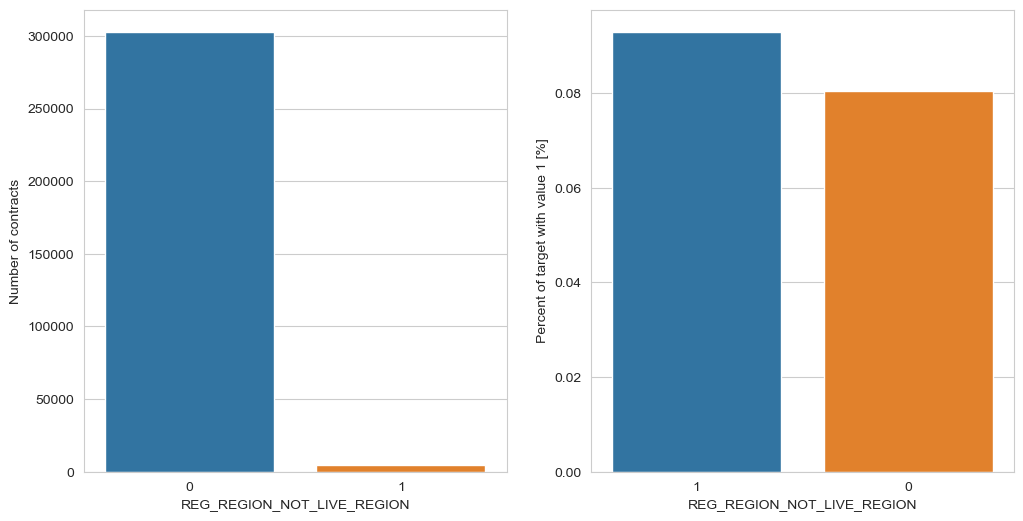

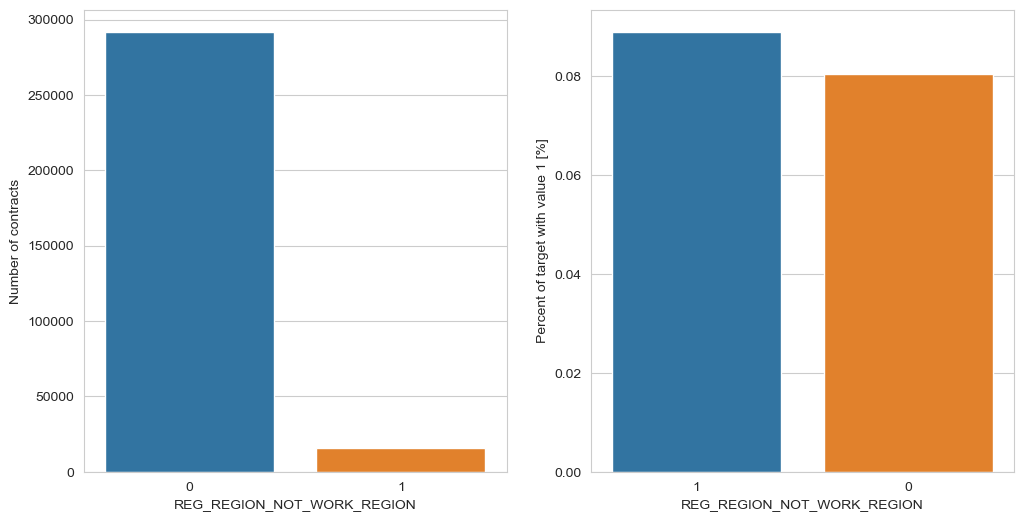

In [41]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

Very few people are registered in not live or not work region. Generally, the rate of not return is slightly larger for these cases than in the rest (slightly above 8% compared with approx. 8%)

### City registered not live city and not work city

Let's represent the values of City registered not live city and not work city.

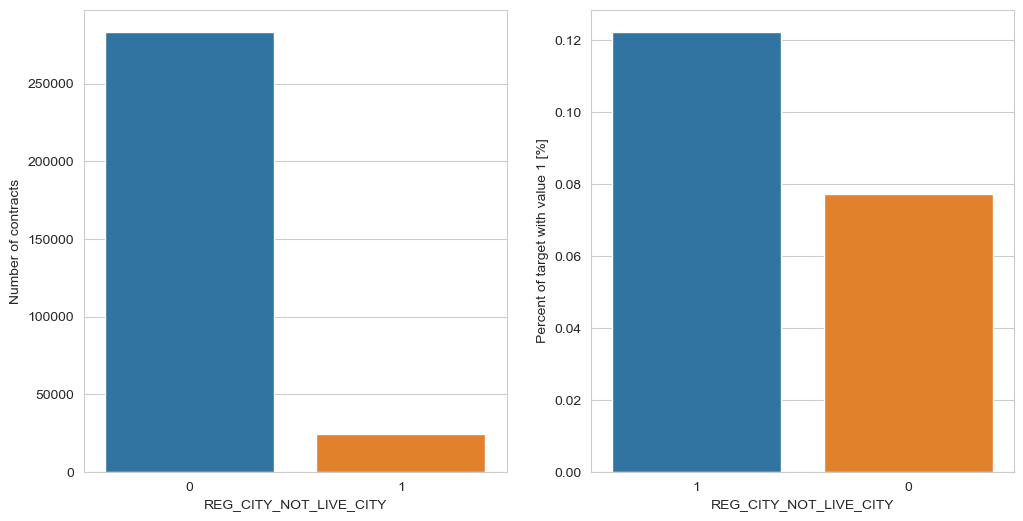

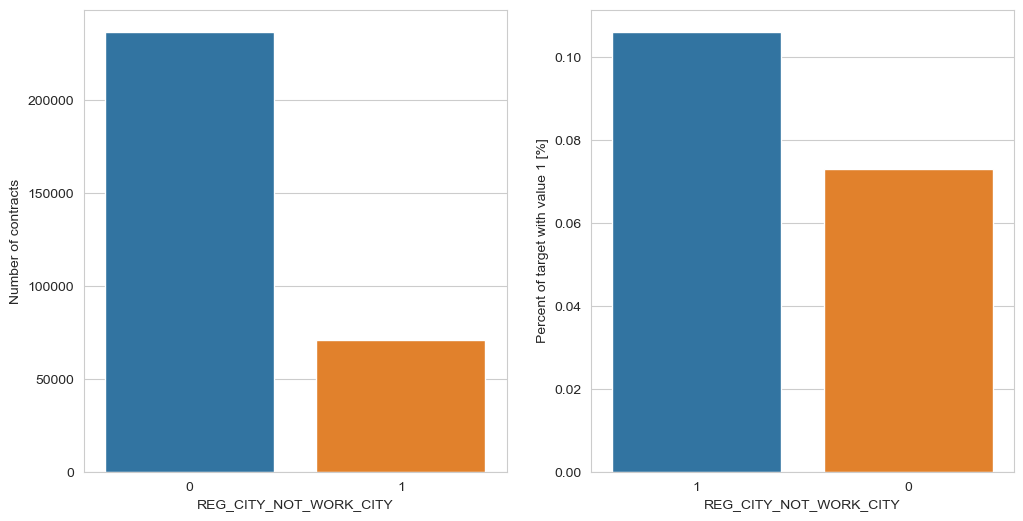

In [42]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

Generally, much more people register in the city they live or work (a larger number register differently in the working city than living city).

The ones that register in different city than the working or living city are more frequently not-repaying the loans than the ones that register same city (work 11% or live 12%).

### Exterior Sources

The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means.


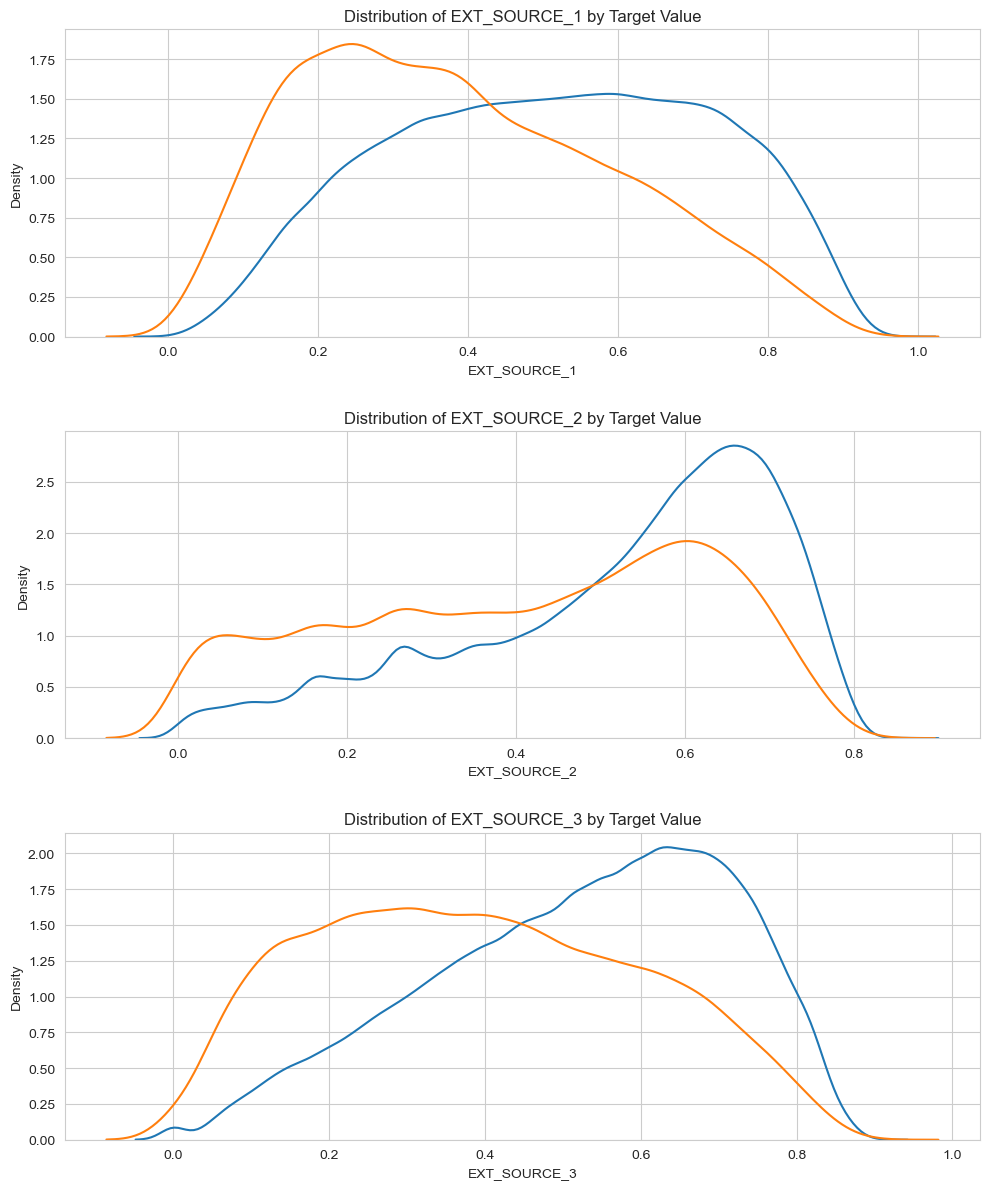

In [43]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan.


Lets also see correlations of the EXT_SOURCE features with the target and with each other.

In [44]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.155317,-0.160472,-0.178919
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000


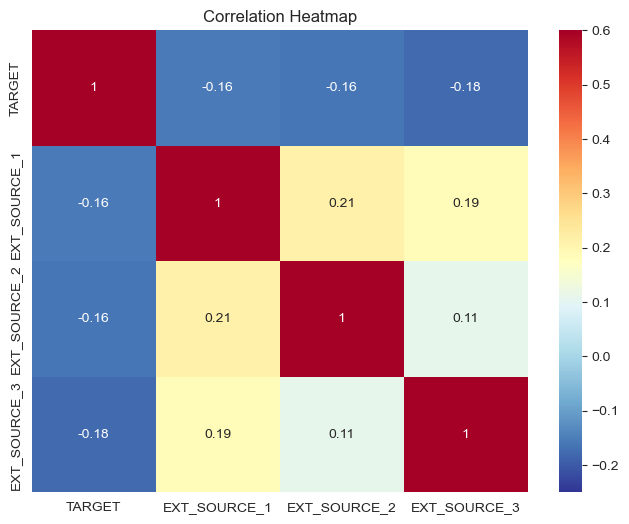

In [45]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan.

### correlation

In [46]:
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.15

### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [47]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = application_train.corr().abs()
#corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
upper.head()


#Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

There are 34 columns to remove.


In [48]:
to_drop

['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [49]:
to_drop =['REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_POPULATION_RELATIVE']

In [50]:
print('Training shape: ', application_train.shape)
application_train = application_train.drop(columns = to_drop)
print('New Training shape: ', application_train.shape)

Training shape:  (307511, 122)
New Training shape:  (307511, 87)


In [51]:
#corrmat = application_train.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
#plot heat map
#g=sns.heatmap(application_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Handling missing values

<Axes: >

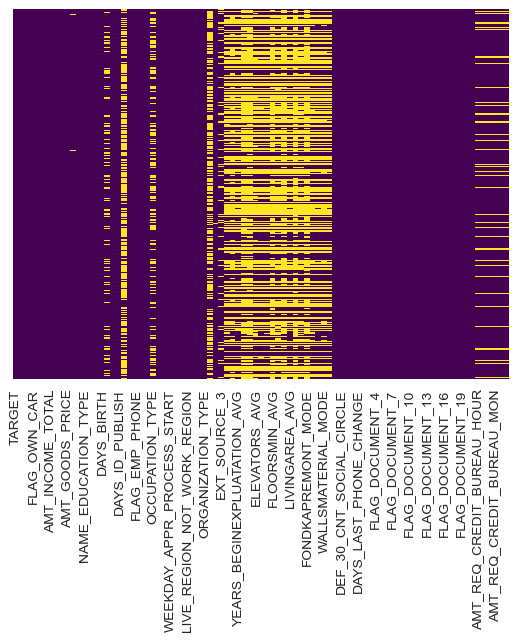

In [52]:
sns.heatmap(application_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
# Missing values statistics
missing_values = missing_values_table(application_train)
missing_values.head(40)

Your selected dataframe has 87 columns.
There are 40 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
FLOORSMIN_AVG,208642,67.8
YEARS_BUILD_AVG,204488,66.5
OWN_CAR_AGE,202929,66.0
LANDAREA_AVG,182590,59.4
BASEMENTAREA_AVG,179943,58.5
EXT_SOURCE_1,173378,56.4


In [54]:
application_train.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [55]:
categorical_vars = [var for var in application_train.columns if application_train[var].isnull().mean()>0 and
                   application_train[var].dtypes=='O']
categorical_vars

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [56]:
numeric_vars=missing_values.index.tolist()
numeric_vars = [e for e in numeric_vars if e not in categorical_vars]
numeric_vars

['COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_AVG',
 'APARTMENTS_AVG',
 'ENTRANCES_AVG',
 'LIVINGAREA_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'TOTALAREA_MODE',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

In [57]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values=np.nan, strategy='median')


application_train[numeric_vars] = imputer.fit_transform(application_train[numeric_vars])


In [58]:
print(application_train['NAME_TYPE_SUITE'].mode())


0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object


In [59]:
application_train['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

In [60]:
print(application_train['OCCUPATION_TYPE'].mode())

0    Laborers
Name: OCCUPATION_TYPE, dtype: object


In [61]:
application_train['OCCUPATION_TYPE'].fillna('Laborers',inplace=True)

In [62]:
print(application_train['FONDKAPREMONT_MODE'].mode())

0    reg oper account
Name: FONDKAPREMONT_MODE, dtype: object


In [63]:
application_train['FONDKAPREMONT_MODE'].fillna('reg oper account',inplace=True)

In [64]:
print(application_train['HOUSETYPE_MODE'].mode())

0    block of flats
Name: HOUSETYPE_MODE, dtype: object


In [65]:
application_train['HOUSETYPE_MODE'].fillna('block of flats',inplace=True)

In [66]:
print(application_train['WALLSMATERIAL_MODE'].mode())

0    Panel
Name: WALLSMATERIAL_MODE, dtype: object


In [67]:
application_train['WALLSMATERIAL_MODE'].fillna('Panel',inplace=True)

In [68]:
print(application_train['EMERGENCYSTATE_MODE'].mode()) 

0    No
Name: EMERGENCYSTATE_MODE, dtype: object


In [69]:
application_train['EMERGENCYSTATE_MODE'].fillna('No',inplace=True)

In [70]:
application_train.isnull().sum().sum()

0

In [71]:
application_train.shape

(307511, 87)

## Encoding
Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories.

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in application_train:
    if application_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(application_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(application_train[col])
            # Transform both training and testing data
            application_train[col] = le.transform(application_train[col])
                       
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [74]:
# one-hot encoding of categorical variables
application_train = pd.get_dummies(application_train)

print('Features shape: ', application_train.shape)

Features shape:  (307511, 207)


### Domain Knowledge Features

CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income <br>
ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income <br>
CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due) <br>
DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age <br>

In [75]:
application_train['CREDIT_INCOME_PERCENT'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_train['ANNUITY_INCOME_PERCENT'] = application_train['AMT_ANNUITY'] / application_train['AMT_INCOME_TOTAL']
application_train['CREDIT_TERM'] = application_train['AMT_ANNUITY'] / application_train['AMT_CREDIT']
application_train['DAYS_EMPLOYED_PERCENT'] = application_train['DAYS_EMPLOYED'] / application_train['DAYS_BIRTH']

### Save the clean dataset 

In [76]:
application_train.to_csv('cleandata.csv', index=False)

# Supervised Learning Technique

his notebook show how Supervised Machine Learning techniques can be used to predict the Loan defaulters

Algorithms used:
Logistic regression
Random Forest
Extreme Gradient Boost

Also I have used SMOTE and Random OverSampler to balance the class.

# Load the data

In [77]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import sys
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [78]:
application_train = pd.read_csv('cleandata.csv')

# Modeling

# Partitioning

In [79]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = application_train[application_train['TARGET']==1]

Valid = application_train[application_train['TARGET']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

print('outlier_fraction for the whole dataset:')
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

outlier_fraction for the whole dataset:
0.08781828601345662
Fraud Cases : 24825
Valid Cases : 282686


In [80]:
from sklearn.model_selection import train_test_split

#Create independent and Dependent Features
columns = application_train.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["TARGET"]]
# Store the variable we are predicting 
target = "TARGET"
# Define a random state 
state = np.random.RandomState(42)
X = application_train[columns]
y = application_train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(246008, 210) (246008,)
(61503, 210) (61503,)


# More Feature Selection

using RandomForestClassifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [82]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=state))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x1AED3059E40))

In [83]:
sel.get_support()

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [84]:
selected_feat= X_train.columns[(sel.get_support())].tolist()
len(selected_feat)

41

In [85]:
print(selected_feat)

['FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_FAMILY_STATUS_Married', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']


In [86]:
app_X_train = X_train.copy() #Taking a copy before dropping 
app_X_test = X_test.copy()

In [87]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

In [88]:
print (X_train.shape, X_test.shape)

(246008, 41) (61503, 41)


# Logistic Regression

In [89]:

from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(C = 2)

In [90]:
logistic_regressor.fit(X_train,y_train)


LogisticRegression(C=2)

In [91]:
y_pred = logistic_regressor.predict(X_test)

In [92]:
from sklearn.metrics import classification_report,accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Logistic Regression errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Logistic Regression errors: 5008
Accuracy Score :
0.9185730777360454
Confusion matrix :
[[56495     0]
 [ 5008     0]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56495
           1       0.00      0.00      0.00      5008

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.84      0.92      0.88     61503

ROC AUC score is:  0.5


# Random Forest - Bagging ensemble of Decision trees

In [93]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = state, verbose = 1, n_jobs = -1)

In [94]:
random_forest.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestClassifier(n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x1AED3059E40,
                       verbose=1)

In [95]:
y_pred = random_forest.predict(X_test) 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


In [96]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Random Forest errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Random Forest errors: 4994
Accuracy Score :
0.9188007089085085
Confusion matrix :
[[56475    20]
 [ 4974    34]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56495
           1       0.63      0.01      0.01      5008

    accuracy                           0.92     61503
   macro avg       0.77      0.50      0.49     61503
weighted avg       0.90      0.92      0.88     61503

ROC AUC score is:  0.5032175618753334


# Extreme Gradient Boost Model

In [97]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [98]:
from xgboost import XGBClassifier

In [99]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [100]:
y_pred = xgb_classifier.predict(X_test)

In [101]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Extreme Gradient Boost errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Extreme Gradient Boost errors: 5057
Accuracy Score :
0.9177763686324244
Confusion matrix :
[[56284   211]
 [ 4846   162]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56495
           1       0.43      0.03      0.06      5008

    accuracy                           0.92     61503
   macro avg       0.68      0.51      0.51     61503
weighted avg       0.88      0.92      0.88     61503

ROC AUC score is:  0.5143066995100078


# Balancing class - using SMOTETomek

I have used SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).

In [102]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [103]:
!pip install --upgrade joblib

In [104]:
# Implementing Oversampling for Handling Imbalanced 
# This code takes time to run atleast one hour
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_train,y_train)

  File "C:\Users\prati\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\prati\anaconda3\Lib\subprocess.py", line 1509, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [105]:
X_res.shape,y_res.shape

((447690, 41), (447690,))

In [106]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 226191, 1: 19817})
Resampled dataset shape Counter({0: 223845, 1: 223845})


# Logistic regression

In [107]:
logistic_regressor.fit(X_res,y_res)

LogisticRegression(C=2)

In [108]:
y_pred = logistic_regressor.predict(X_test)

In [109]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Logistic Regression errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Logistic Regression errors: 22304
Accuracy Score :
0.6373510235273077
Confusion matrix :
[[36633 19862]
 [ 2442  2566]]
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     56495
           1       0.11      0.51      0.19      5008

    accuracy                           0.64     61503
   macro avg       0.53      0.58      0.48     61503
weighted avg       0.87      0.64      0.72     61503

ROC AUC score is:  0.5804046281061374


# Random forest

In [110]:
random_forest.fit(X_res,y_res)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


RandomForestClassifier(n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x1AED3059E40,
                       verbose=1)

In [111]:
y_pred = random_forest.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished


In [112]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Random Forest errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Random Forest errors: 5270
Accuracy Score :
0.9143131229370925
Confusion matrix :
[[56126   369]
 [ 4901   107]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56495
           1       0.22      0.02      0.04      5008

    accuracy                           0.91     61503
   macro avg       0.57      0.51      0.50     61503
weighted avg       0.86      0.91      0.88     61503

ROC AUC score is:  0.5074171316158772


# XGBoost

In [113]:
X_res = pd.DataFrame(data=X_res, columns=selected_feat)

In [114]:
xgb_classifier.fit(X_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [115]:
y_pred = xgb_classifier.predict(X_test)

In [116]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Extreme Gradient Boost errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Extreme Gradient Boost errors: 5158
Accuracy Score :
0.9161341723167975
Confusion matrix :
[[56128   367]
 [ 4791   217]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56495
           1       0.37      0.04      0.08      5008

    accuracy                           0.92     61503
   macro avg       0.65      0.52      0.52     61503
weighted avg       0.88      0.92      0.88     61503

ROC AUC score is:  0.5184172604123692


# Balancing class - RandomOverSampler

In [117]:
from imblearn.over_sampling import RandomOverSampler

In [118]:
os =  RandomOverSampler(sampling_strategy=1)

In [119]:
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

In [120]:
X_train_res.shape,y_train_res.shape

((452382, 41), (452382,))

In [121]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 226191, 1: 19817})
Resampled dataset shape Counter({0: 226191, 1: 226191})


# Logistic regression

In [122]:
logistic_regressor.fit(X_train_res,y_train_res)

LogisticRegression(C=2)

In [123]:
y_pred = logistic_regressor.predict(X_test)

In [124]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Logistic Regression errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Logistic Regression errors: 22210
Accuracy Score :
0.638879404256703
Confusion matrix :
[[36678 19817]
 [ 2393  2615]]
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     56495
           1       0.12      0.52      0.19      5008

    accuracy                           0.64     61503
   macro avg       0.53      0.59      0.48     61503
weighted avg       0.87      0.64      0.72     61503

ROC AUC score is:  0.5856950659633144


# Random forest

In [125]:
random_forest.fit(X_train_res,y_train_res)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomForestClassifier(n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x1AED3059E40,
                       verbose=1)

In [126]:
y_pred = random_forest.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.7s finished


In [127]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Random Forest errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Random Forest errors: 5099
Accuracy Score :
0.917093475115035
Confusion matrix :
[[56245   250]
 [ 4849   159]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56495
           1       0.39      0.03      0.06      5008

    accuracy                           0.92     61503
   macro avg       0.65      0.51      0.51     61503
weighted avg       0.88      0.92      0.88     61503

ROC AUC score is:  0.513662015454448


# XGBoost

In [128]:
X_train_res = pd.DataFrame(data=X_train_res, columns=selected_feat)

In [129]:
X_train_res.shape

(452382, 41)

In [130]:
xgb_classifier.fit(X_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [131]:
y_pred = xgb_classifier.predict(X_test)

In [132]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Extreme Gradient Boost errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Extreme Gradient Boost errors: 16104
Accuracy Score :
0.7381591141895517
Confusion matrix :
[[42325 14170]
 [ 1934  3074]]
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     56495
           1       0.18      0.61      0.28      5008

    accuracy                           0.74     61503
   macro avg       0.57      0.68      0.56     61503
weighted avg       0.89      0.74      0.79     61503

ROC AUC score is:  0.681499617427763


# Unsupervised Learning Technique (Anomaly detection)

This notebook show how Unsupervised Machine Learning techniques can be used to predict the Loan defaulters

Algorithms used:

1.k-nearest neighbors
2.Isolation Forest
3.Local Outlier Factor
4.Clustering-Based Local Outlier Factor
5.Principal Component Analysis
6.Histogram-based Outlier Score

# Load the data

In [133]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import sys
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [134]:
application_train = pd.read_csv('cleandata.csv')

# Modeling

# Partitioning

In [135]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = application_train[application_train['TARGET']==1]

Valid = application_train[application_train['TARGET']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

print('outlier_fraction for the whole dataset:')
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

outlier_fraction for the whole dataset:
0.08781828601345662
Fraud Cases : 24825
Valid Cases : 282686


In [136]:
from sklearn.model_selection import train_test_split

#Create independent and Dependent Features
columns = application_train.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["TARGET"]]
# Store the variable we are predicting 
target = "TARGET"
# Define a random state 
state = np.random.RandomState(42)
X = application_train[columns]
y = application_train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(246008, 210) (246008,)
(61503, 210) (61503,)


In [137]:
X_train.shape

(246008, 210)

# More Feature Selection

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [139]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=state))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x1AEBF829240))

In [140]:
sel.get_support()

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [141]:
selected_feat= X_train.columns[(sel.get_support())].tolist()
len(selected_feat)

42

In [142]:
print(selected_feat)

['FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_FAMILY_STATUS_Married', 'OCCUPATION_TYPE_Laborers', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']


In [143]:
selected_feat = ['FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_FAMILY_STATUS_Married', 'OCCUPATION_TYPE_Laborers', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']

In [144]:
app_X_train = X_train.copy() #Taking a copy before dropping 
app_X_test = X_test.copy()

In [145]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

In [146]:
print (X_train.shape, X_test.shape)

(246008, 42) (61503, 42)


# PyOD

In [147]:
!pip install --upgrade pyod

# KNN

In [148]:
from pyod.models.knn import KNN  

In [149]:
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [150]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [151]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)



On Training Data:
KNN ROC:0.4792, precision @ rank n:0.0646

On Test Data:
KNN ROC:0.4827, precision @ rank n:0.0628


Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Higher => More Anomalous')

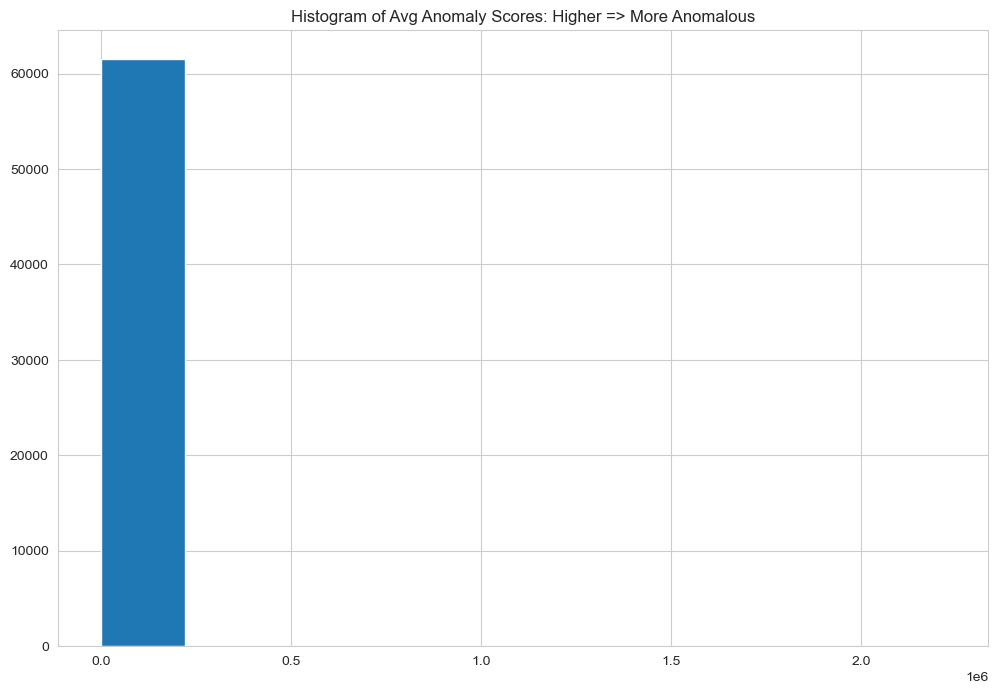

In [152]:
plt.figure(figsize=(12,8))

#bins = np.linspace(0.0, 0.05)
plt.hist(y_test_scores)

plt.title('Histogram of Avg Anomaly Scores: Higher => More Anomalous')

In [153]:
from sklearn.metrics import classification_report,accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

n_errors = (y_test_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("KNN errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test,y_test_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_test_pred))

KNN errors: 10111
Accuracy Score :
0.8356015153732338
Confusion matrix :
[[51008  5639]
 [ 4472   384]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56647
           1       0.06      0.08      0.07      4856

    accuracy                           0.84     61503
   macro avg       0.49      0.49      0.49     61503
weighted avg       0.85      0.84      0.84     61503

ROC AUC score is:  0.4897655584256604


# iForest

In [154]:
from __future__ import division
from __future__ import print_function

In [155]:
from pyod.models.iforest import IForest

In [156]:
clf_name = 'IForest'
clf = IForest(random_state=state)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)



On Training Data:
IForest ROC:0.474, precision @ rank n:0.0558

On Test Data:
IForest ROC:0.4732, precision @ rank n:0.0535


Text(0.5, 1.0, 'Histogram')

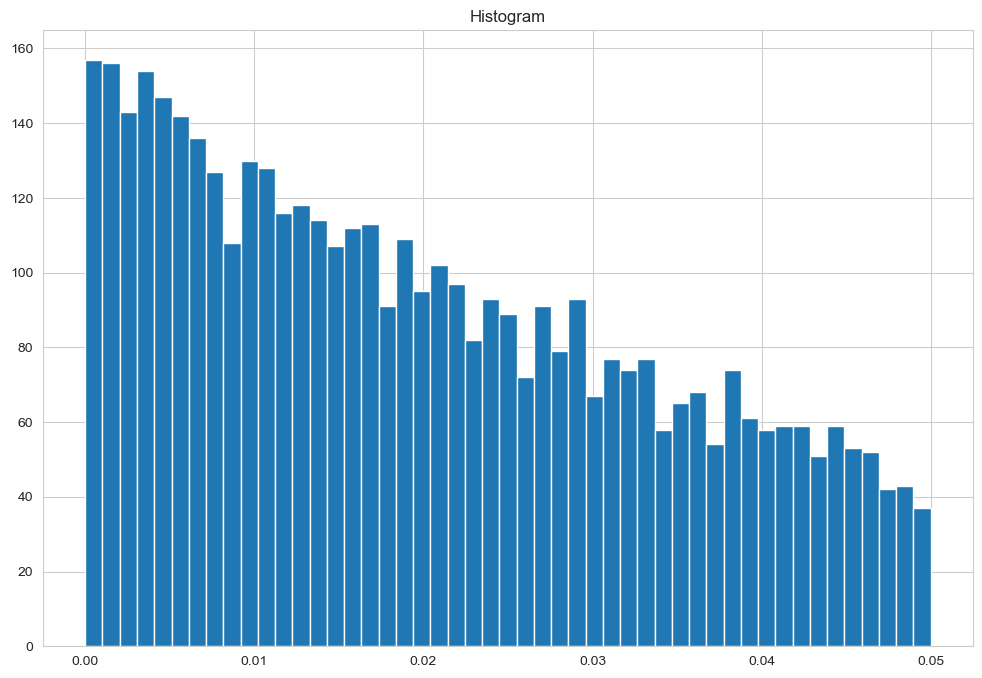

In [157]:
plt.figure(figsize=(12,8))

bins = np.linspace(0.0, 0.05)
plt.hist(y_test_scores, bins)

plt.title('Histogram')

In [158]:
n_errors = (y_test_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Isolation Forest errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test,y_test_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_test_pred))

Isolation Forest errors: 10344
Accuracy Score :
0.8318130822886688
Confusion matrix :
[[50821  5826]
 [ 4518   338]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56647
           1       0.05      0.07      0.06      4856

    accuracy                           0.83     61503
   macro avg       0.49      0.48      0.48     61503
weighted avg       0.85      0.83      0.84     61503

ROC AUC score is:  0.48337857701306886


# Local Outlier Factor

In [159]:
from pyod.models.lof import LOF

In [160]:
clf_name = 'LOF'
clf = LOF()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
LOF ROC:0.4871, precision @ rank n:0.0768

On Test Data:
LOF ROC:0.4948, precision @ rank n:0.0733


Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Higher => More Anomalous')

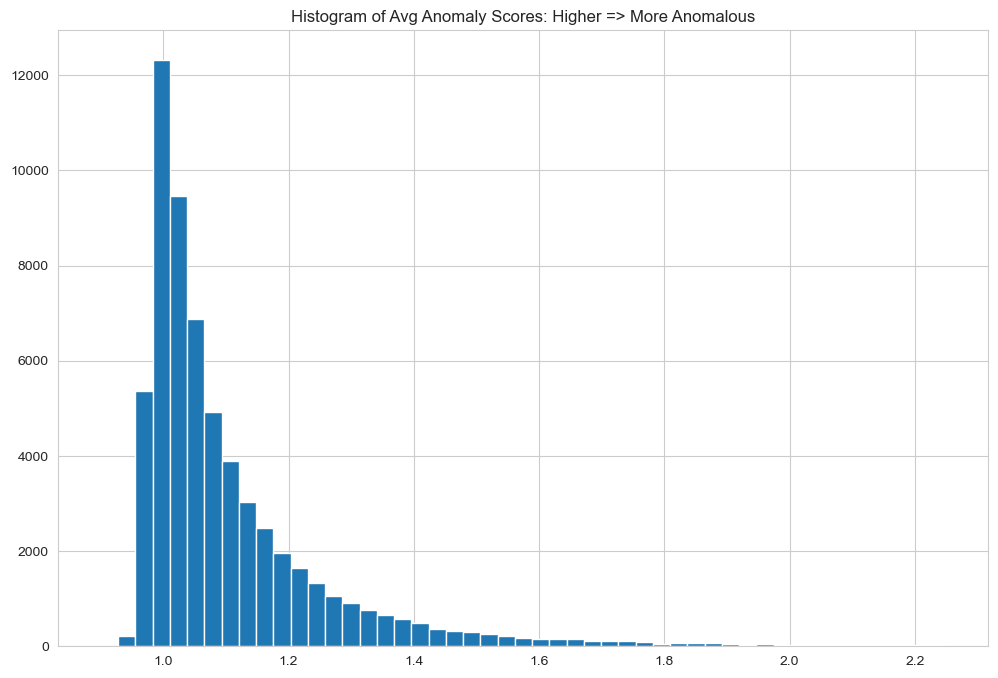

In [161]:
plt.figure(figsize=(12,8))

bins = np.linspace(0.9, 2.25)
plt.hist(y_test_scores, bins)

plt.title('Histogram of Avg Anomaly Scores: Higher => More Anomalous')

In [162]:
n_errors = (y_test_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Local Outlier Factor errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test,y_test_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_test_pred))

Local Outlier Factor errors: 10194
Accuracy Score :
0.8342519877079166
Confusion matrix :
[[50836  5811]
 [ 4383   473]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56647
           1       0.08      0.10      0.08      4856

    accuracy                           0.83     61503
   macro avg       0.50      0.50      0.50     61503
weighted avg       0.85      0.83      0.84     61503

ROC AUC score is:  0.49741130539374034


# Clustering-Based Local Outlier Factor

In [163]:
from pyod.models.cblof import CBLOF

In [164]:
# train CBLOF detector
clf_name = 'CBLOF'
clf = CBLOF(random_state=state)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
CBLOF ROC:0.4753, precision @ rank n:0.0558

On Test Data:
CBLOF ROC:0.4788, precision @ rank n:0.056


Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Higher => More Anomalous')

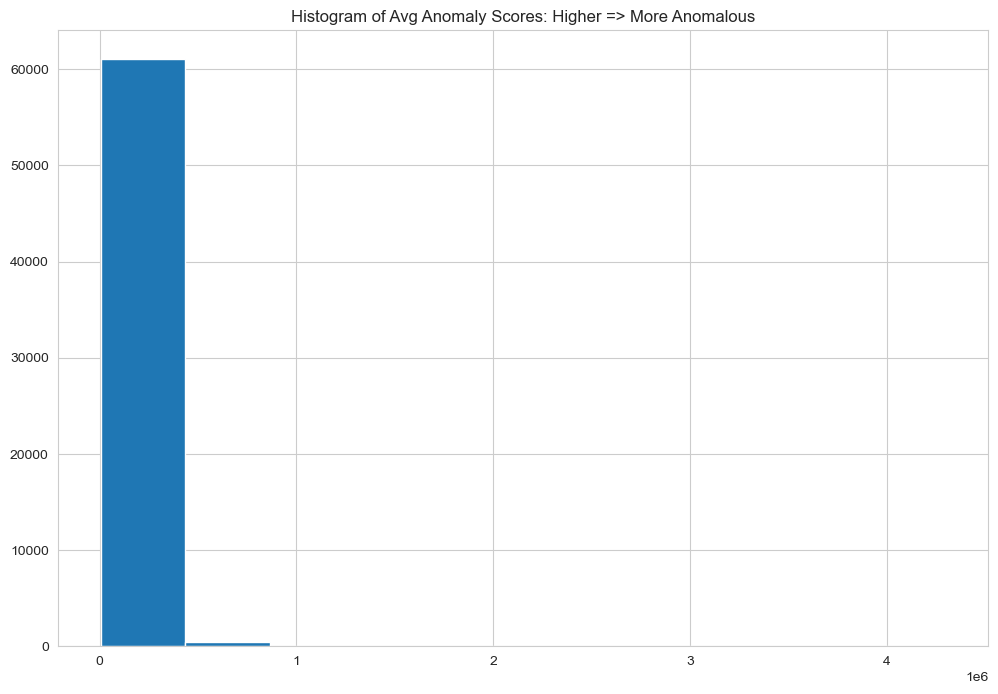

In [165]:
plt.figure(figsize=(12,8))

#bins = np.linspace(0.0, 1.25)
plt.hist(y_test_scores)

plt.title('Histogram of Avg Anomaly Scores: Higher => More Anomalous')

In [166]:
n_errors = (y_test_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Clustering-Based Local Outlier Factor errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test,y_test_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_test_pred))

Clustering-Based Local Outlier Factor errors: 10254
Accuracy Score :
0.8332764255402175
Confusion matrix :
[[50901  5746]
 [ 4508   348]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56647
           1       0.06      0.07      0.06      4856

    accuracy                           0.83     61503
   macro avg       0.49      0.49      0.49     61503
weighted avg       0.85      0.83      0.84     61503

ROC AUC score is:  0.48511435847000567


# Principal component analysis

In [167]:
from pyod.models.pca import PCA

In [168]:
clf_name = 'PCA'
clf = PCA(n_components=2,random_state=state)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
PCA ROC:0.4952, precision @ rank n:0.063

On Test Data:
PCA ROC:0.4944, precision @ rank n:0.0675


Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Higher => More Anomalous')

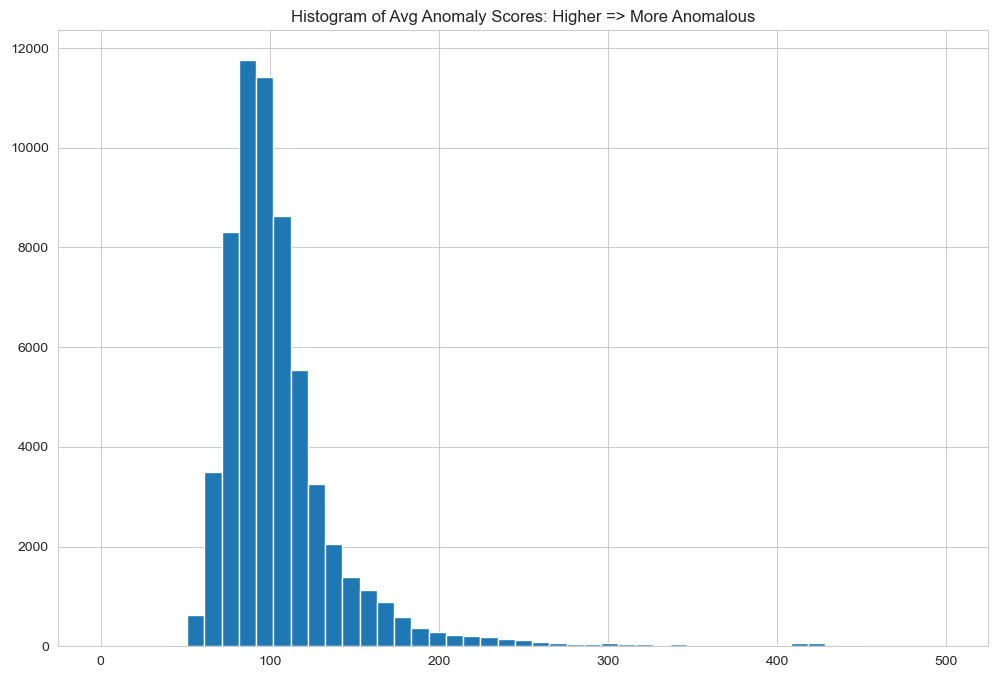

In [169]:
plt.figure(figsize=(12,8))

bins = np.linspace(0,500)
plt.hist(y_test_scores,bins)

plt.title('Histogram of Avg Anomaly Scores: Higher => More Anomalous')

In [170]:
n_errors = (y_test_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Principal component analysis errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test,y_test_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_test_pred))

Principal component analysis errors: 10251
Accuracy Score :
0.8333252036486025
Confusion matrix :
[[50849  5798]
 [ 4453   403]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56647
           1       0.06      0.08      0.07      4856

    accuracy                           0.83     61503
   macro avg       0.49      0.49      0.49     61503
weighted avg       0.85      0.83      0.84     61503

ROC AUC score is:  0.4903184728458962


# Histogram-based Outlier Score

In [171]:
from pyod.models.hbos import HBOS

In [172]:
clf_name = 'HBOS'
clf = HBOS()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
HBOS ROC:0.4813, precision @ rank n:0.0593

On Test Data:
HBOS ROC:0.4793, precision @ rank n:0.057


Text(0.5, 1.0, 'Histogram')

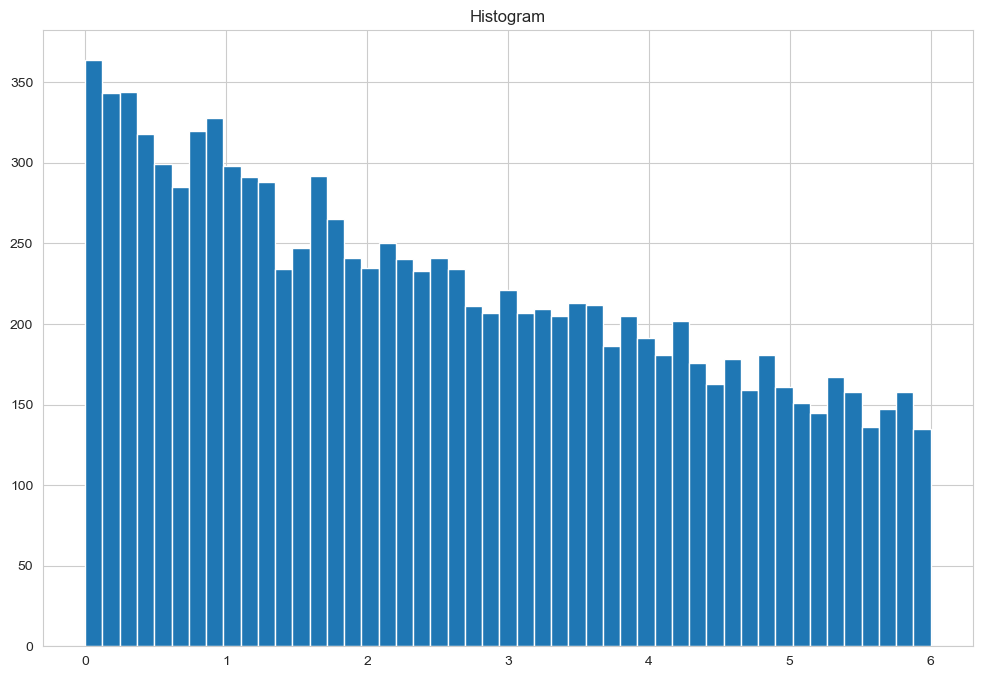

In [173]:
plt.figure(figsize=(12,8))

bins = np.linspace(0, 6)
plt.hist(y_test_scores, bins)

plt.title('Histogram')

In [174]:
n_errors = (y_test_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Histogram-based Outlier Score errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test,y_test_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_test_pred))

Histogram-based Outlier Score errors: 10434
Accuracy Score :
0.8303497390371202
Confusion matrix :
[[50721  5926]
 [ 4508   348]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56647
           1       0.06      0.07      0.06      4856

    accuracy                           0.83     61503
   macro avg       0.49      0.48      0.48     61503
weighted avg       0.85      0.83      0.84     61503

ROC AUC score is:  0.4835255717734463


# Unsupervised Learning Technique (Anomaly detection)

This notebook show how Unsupervised Machine Learning techniques can be used to predict the Loan defaulters

1.Algorithms used:
2.Isolation Forest
3.Local Outlier Factor
4.Principal Component Analysis (PCA)
5.Kernel Principal Component Analysis (Kernel PCA)

# Load the data

In [175]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import sys
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [176]:
application_train = pd.read_csv('cleandata.csv')

# Modeling

# Partitioning

In [177]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = application_train[application_train['TARGET']==1]

Valid = application_train[application_train['TARGET']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

print('outlier_fraction for the whole dataset:')
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

outlier_fraction for the whole dataset:
0.08781828601345662
Fraud Cases : 24825
Valid Cases : 282686


In [178]:
from sklearn.model_selection import train_test_split

#Create independent and Dependent Features
columns = application_train.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["TARGET"]]
# Store the variable we are predicting 
target = "TARGET"
# Define a random state 
state = np.random.RandomState(42)
X = application_train[columns]
y = application_train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(246008, 210) (246008,)
(61503, 210) (61503,)


# More Feature Selection

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [180]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=state))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x1AEA2965240))

In [181]:
sel.get_support()

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [182]:
selected_feat= X_train.columns[(sel.get_support())].tolist()
len(selected_feat)

43

In [183]:
print(selected_feat)

['FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_FAMILY_STATUS_Married', 'OCCUPATION_TYPE_Laborers', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']


In [184]:
app_X_train = X_train.copy() #Taking a copy before dropping 
app_X_test = X_test.copy()

In [185]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

In [186]:
print (X_train.shape, X_test.shape)

(246008, 43) (61503, 43)


In [187]:
from sklearn.metrics import classification_report,accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Isolation Forest

In [188]:
clf = IsolationForest(n_estimators= 120, max_samples=len(X_train), contamination=outlier_fraction, random_state=state, verbose=0)

In [189]:
clf.fit(X_train,y_train)

IsolationForest(contamination=0.08781828601345662, max_samples=246008,
                n_estimators=120,
                random_state=RandomState(MT19937) at 0x1AEA2965240)

Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Lower => More Anomalous')

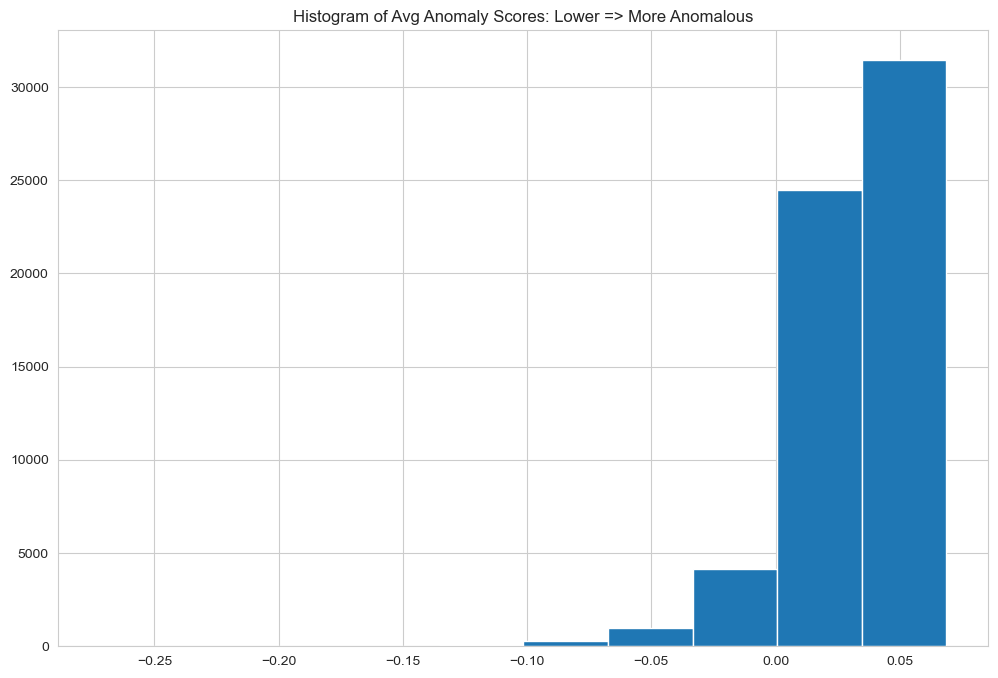

In [190]:
if_scores = clf.decision_function(X_test)
plt.figure(figsize=(12,8))

plt.hist(if_scores)
plt.title('Histogram of Avg Anomaly Scores: Lower => More Anomalous')

In [191]:
y_pred = clf.predict(X_test)

In [192]:
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y_test).sum()

In [193]:

# Run Classification Metrics
print("{}: {}".format("Isolation Forest errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Isolation Forest errors: 9713
Accuracy Score :
0.8420727444189714
Confusion matrix :
[[51413  5010]
 [ 4703   377]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     56423
           1       0.07      0.07      0.07      5080

    accuracy                           0.84     61503
   macro avg       0.49      0.49      0.49     61503
weighted avg       0.85      0.84      0.84     61503

ROC AUC score is:  0.49270951066891944


# Local Outlier Factor

In [194]:
lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination = outlier_fraction, novelty=True) #novelty = True to test on unseen data

In [195]:
lof.fit(X_train,y_train)

LocalOutlierFactor(contamination=0.08781828601345662, novelty=True)

In [196]:
y_pred = lof.predict(X_test)

Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Higher => More Anomalous')

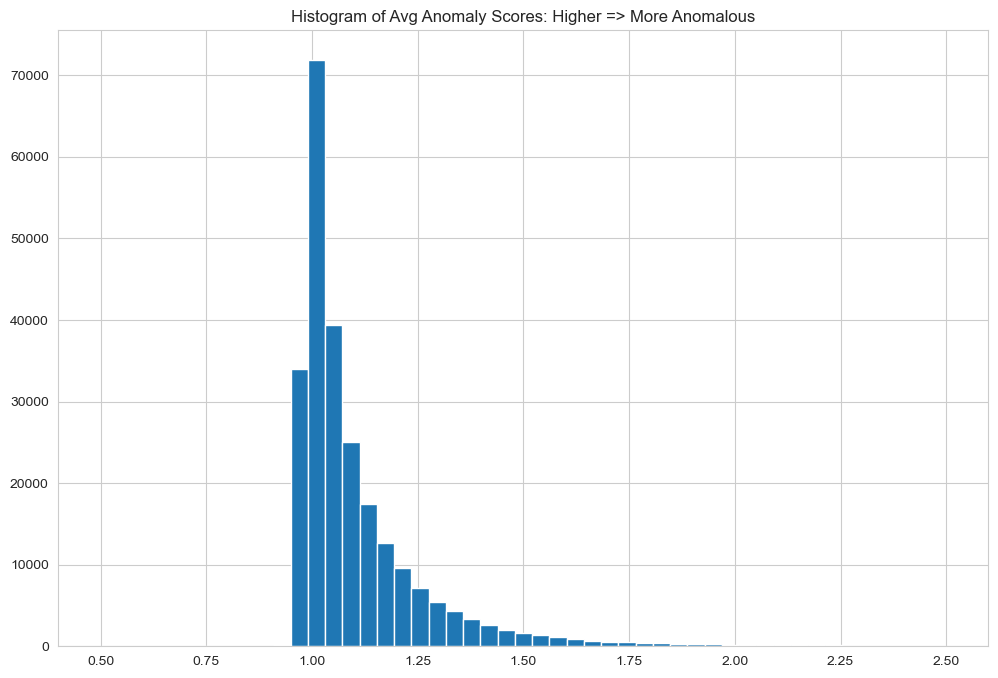

In [197]:
LOF_Scores = lof.negative_outlier_factor_
plt.figure(figsize=(12,8))

bins = np.linspace(0.5, 2.5)
plt.hist(-LOF_Scores, bins)
plt.title('Histogram of Avg Anomaly Scores: Higher => More Anomalous')


In [198]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Local Outlier Factor errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Local Outlier Factor errors: 9817
Accuracy Score :
0.8403817699949596
Confusion matrix :
[[51275  5148]
 [ 4669   411]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     56423
           1       0.07      0.08      0.08      5080

    accuracy                           0.84     61503
   macro avg       0.50      0.49      0.49     61503
weighted avg       0.85      0.84      0.84     61503

ROC AUC score is:  0.49483306180913267


# PCA

In [199]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [200]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [201]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])

    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()

    if returnPreds==True:
        return preds

In [202]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

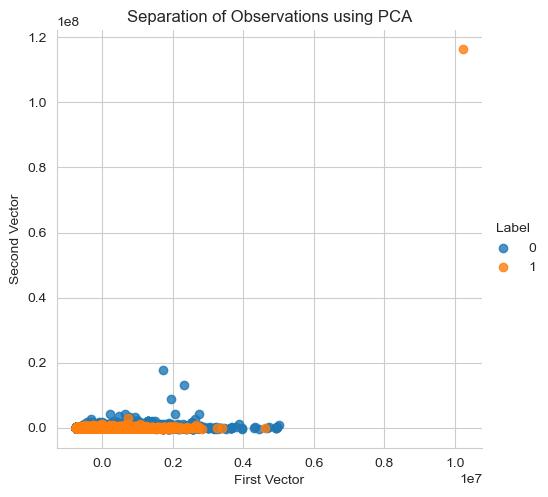

In [203]:
from sklearn.decomposition import PCA

n_components = 22
whiten = False
random_state = state

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

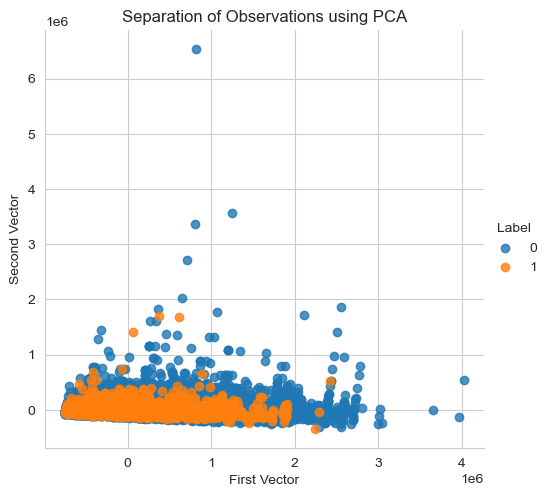

In [204]:
# PCA on Test Set
X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse, \
                                  index=X_test.index)

scatterPlot(X_test_PCA, y_test, "PCA")

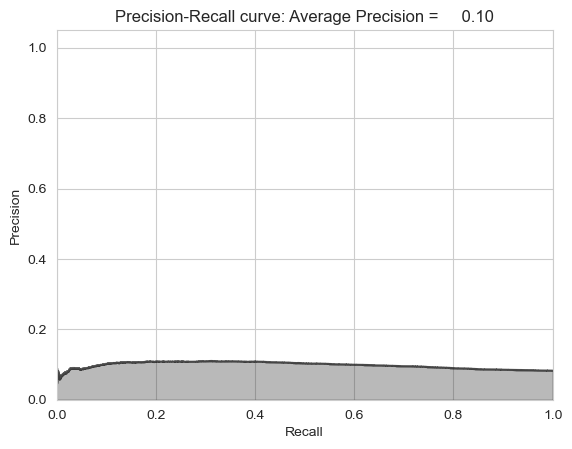

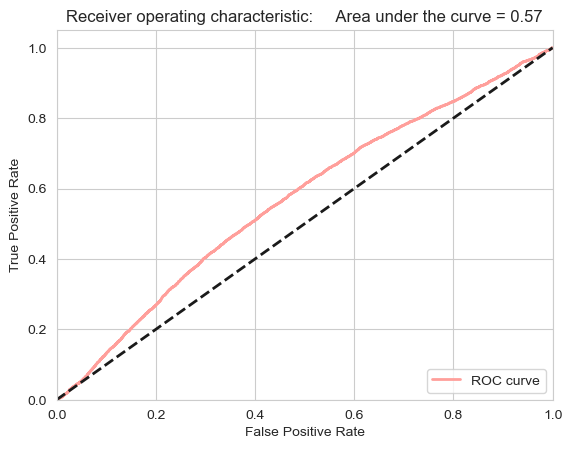

In [205]:
anomalyScoresPCA = anomalyScores(X_test, X_test_PCA_inverse)
preds = plotResults(y_test, anomalyScoresPCA, True)

In [206]:
X_test

,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_FAMILY_STATUS_Married,OCCUPATION_TYPE_Laborers,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
297483,0,0,225000.0,239850.0,25578.0,225000.0,8582,-1231.0,-5518.0,-1261,7.0,1,1.0,2,0.157952,0.386747,0.112474,0.0990,0.0896,0.9826,0.7620,0.0127,0.2069,0.1667,0.2083,0.0586,0.0807,0.0903,0.0150,0.1001,0.0,0.0,0.0,-868.0,0.0,0.0,1.0,0,0,1.066000,0.113680,0.106642,-0.143440
102143,1,1,135000.0,539100.0,29376.0,450000.0,14885,-1255.0,-1973.0,-4347,9.0,0,3.0,2,0.752111,0.380439,0.535276,0.1052,0.0763,0.9861,0.7552,0.0211,0.0690,0.1667,0.2083,0.0594,0.0756,0.0729,0.0480,0.0678,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0,0,3.993333,0.217600,0.054491,-0.084313
199849,0,0,292500.0,814500.0,58054.5,814500.0,16580,-2445.0,-7077.0,-90,65.0,0,1.0,2,0.505998,0.666996,0.694093,0.0876,0.0763,0.9816,0.7552,0.0211,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0036,0.0688,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,2.784615,0.198477,0.071276,-0.147467
111167,0,0,180000.0,675000.0,38749.5,675000.0,17545,-3831.0,-1415.0,-1071,9.0,0,1.0,1,0.484238,0.745372,0.654529,0.0876,0.0763,0.9816,0.7552,0.0211,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0036,0.0688,0.0,0.0,0.0,-2126.0,0.0,0.0,1.0,0,0,3.750000,0.215275,0.057407,-0.218353
69377,1,0,207000.0,360000.0,38772.0,360000.0,11209,-985.0,-6045.0,-3814,3.0,0,2.0,2,0.505998,0.124621,0.786267,0.1113,0.0840,0.9886,0.8436,0.0492,0.1034,0.3333,0.3750,0.0931,0.0908,0.1168,0.0000,0.1188,5.0,0.0,5.0,-183.0,0.0,0.0,1.0,0,1,1.739130,0.187304,0.107700,-0.087876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285322,1,0,247500.0,1258650.0,53455.5,1125000.0,17436,-74.0,-7837.0,-965,30.0,0,2.0,2,0.611378,0.625899,0.551381,0.0876,0.0763,0.9816,0.7552,0.0211,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0036,0.0688,0.0,0.0,0.0,-1226.0,1.0,0.0,2.0,1,0,5.085455,0.215982,0.042471,-0.004244
87116,1,1,157500.0,604152.0,45301.5,540000.0,14384,-2614.0,-5269.0,-5684,9.0,0,2.0,2,0.545120,0.406025,0.712155,0.0876,0.0763,0.9816,0.7552,0.0211,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0036,0.0688,4.0,0.0,4.0,-1835.0,0.0,0.0,5.0,0,0,3.835886,0.287629,0.074984,-0.181730
28415,1,0,290250.0,1067940.0,31356.0,765000.0,19547,-661.0,-7283.0,-3099,6.0,0,2.0,2,0.505998,0.603420,0.665855,0.0443,0.0014,0.9767,0.6804,0.0085,0.0345,0.3333,0.3750,0.0197,0.0345,0.0386,0.0232,0.0354,0.0,0.0,0.0,-2579.0,3.0,3.0,4.0,1,0,3.679380,0.108031,0.029361,-0.033816
172075,1,1,72000.0,286704.0,22315.5,247500.0,15703,-6372.0,-4087.0,-4646,9.0,0,2.0,2,0.505998,0.464287,0.535276,0.0227,0.0000,0.9672,0.5512,0.0083,0.0345,0.0417,0.0833,0.0481,0.0185,0.0105,0.0000,0.0128,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,3.982000,0.309937,0.077835,-0.405782


In [207]:
anomalyScore=pd.DataFrame(anomalyScoresPCA, columns=['y_scores']) 

In [208]:
anomalyScore.loc[anomalyScore['y_scores'] <= 0.06, 'y_pred'] = 0
anomalyScore.loc[anomalyScore['y_scores'] > 0.06, 'y_pred'] =  1


In [209]:
y_pred = anomalyScore['y_pred']

In [210]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("PCA  errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

PCA  errors: 8824
Accuracy Score :
0.8565273238703803
Confusion matrix :
[[52217  4206]
 [ 4618   462]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     56423
           1       0.10      0.09      0.09      5080

    accuracy                           0.86     61503
   macro avg       0.51      0.51      0.51     61503
weighted avg       0.85      0.86      0.85     61503

ROC AUC score is:  0.5082004064908472


# KERNEL PCA

In [211]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

n_components = 22
kernel = 'rbf'
gamma = None
fit_inverse_transform = True
random_state = state
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, \
                gamma=gamma, fit_inverse_transform= \
                fit_inverse_transform, n_jobs=n_jobs, \
                random_state=random_state)

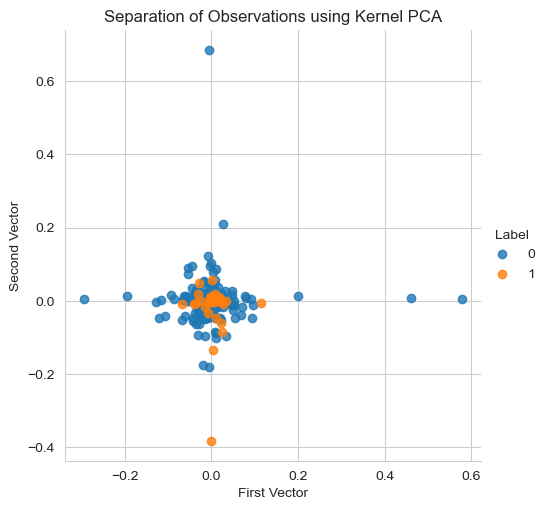

In [212]:
kernelPCA.fit(X_train.iloc[:300])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA, \
                                 index=X_train.index)

X_train_kernelPCA_inverse = kernelPCA.inverse_transform(X_train_kernelPCA)
X_train_kernelPCA_inverse = pd.DataFrame(data=X_train_kernelPCA_inverse, \
                                         index=X_train.index)

scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

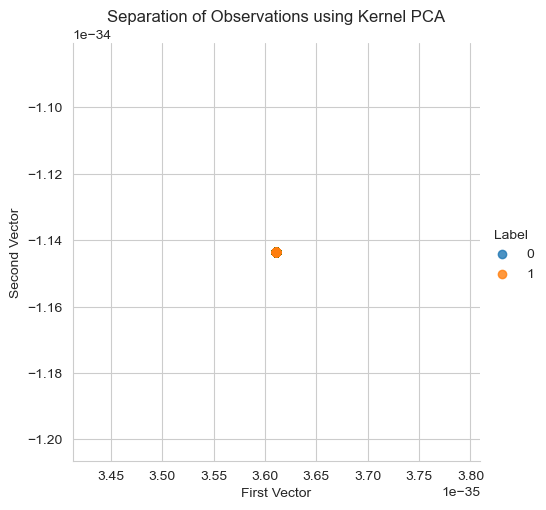

In [213]:
# PCA on Test Set
X_test_kernelPCA = kernelPCA.transform(X_test)
X_test_kernelPCA = pd.DataFrame(data=X_test_kernelPCA, index=X_test.index)

X_test_kernelPCA_inverse = kernelPCA.inverse_transform(X_test_kernelPCA)
X_test_kernelPCA_inverse = pd.DataFrame(data=X_test_kernelPCA_inverse, \
                                  index=X_test.index)

scatterPlot(X_test_kernelPCA, y_test, "Kernel PCA")

In [214]:
anomalyScoreskernelPCA = anomalyScores(X_test,X_test_kernelPCA_inverse)

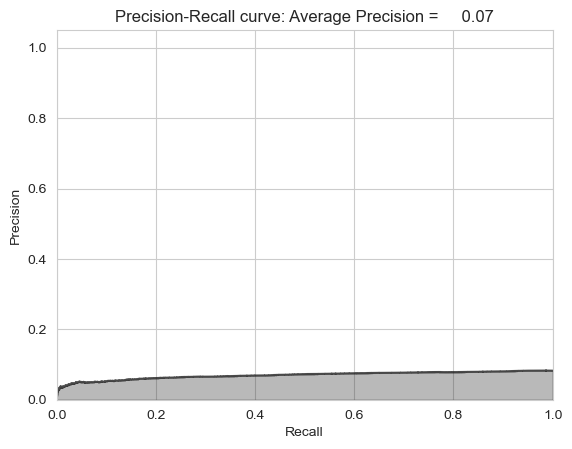

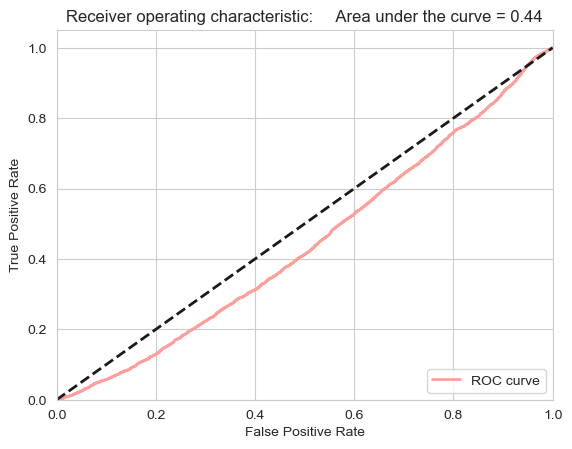

In [215]:
preds = plotResults(y_test, anomalyScoreskernelPCA, True)
anomalyScore=pd.DataFrame(anomalyScoreskernelPCA, columns=['y_scores']) 

In [216]:
anomalyScore.loc[anomalyScore['y_scores'] <= 0.06, 'y_pred'] = 0
anomalyScore.loc[anomalyScore['y_scores'] > 0.06, 'y_pred'] =  1
y_pred = anomalyScore['y_pred']

In [217]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Kernel PCA  errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Kernel PCA  errors: 5906
Accuracy Score :
0.9039721639594817
Confusion matrix :
[[55568   855]
 [ 5051    29]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56423
           1       0.03      0.01      0.01      5080

    accuracy                           0.90     61503
   macro avg       0.47      0.50      0.48     61503
weighted avg       0.84      0.90      0.87     61503

ROC AUC score is:  0.4952776332625844


# Model Comparision

# Supervised ML Model:-

# Unsupervised ML Model:-

In Conclusion Since XGBoost(RandomOverSampler) has better ROC AUC Score. That model is deployed

# Challenges Faced

1)Incorporation of Machine Learning Models Within Regulatory and Risk Constraints

2)Misclassification Cost

3)Imbalanced Data

4)'xgb_classifier' is not defined